# Evaluation Project 1: Baseball Case Study

# Baseball Case Study Prediction is a regression based problem statement to predict number of predicted wins from several indicators of success. This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

# Importing Data From Github repository dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
# Observation 1
shape_of_data=data.shape
print('Number Of Rows: ',shape_of_data[0], 'Number Of Columns: ', shape_of_data[1])

Number Of Rows:  30 Number Of Columns:  17


# Data Cleaning

In [4]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
data=data.rename(columns={'R':'Runs', 'AB':'At Bats', 'H':'Hits', '2B':'Doubles', '3B':'Triples', 'HR':'Homeruns', 'BB':'Walks', 'SO':'Strikeouts', 'SB':'Stolen Bases', 'RA':'Runs Allowed', 'ER':'Earned Runs', 'ERA':'Earned Run Average (ERA)', 'SHO':'Shutouts', 'SV':'Saves', 'CG':'Complete Games', 'E':'Errors', 'W':'Number of predicted wins'})
data

,Number of predicted wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [6]:
print('Type of storage of data ', type(data), '\nType of data series ', type(data.columns))

Type of storage of data  <class 'pandas.core.frame.DataFrame'> 
Type of data series  <class 'pandas.core.indexes.base.Index'>


In [7]:
data.isna().any()

Number of predicted wins    False
Runs                        False
At Bats                     False
Hits                        False
Doubles                     False
Triples                     False
Homeruns                    False
Walks                       False
Strikeouts                  False
Stolen Bases                False
Runs Allowed                False
Earned Runs                 False
Earned Run Average (ERA)    False
Complete Games              False
Shutouts                    False
Saves                       False
Errors                      False
dtype: bool

In [8]:
data.isna().values.any()

False

In [9]:
data.isnull().values.sum()

0

In [10]:
data.dtypes, len(data.dtypes)

(Number of predicted wins      int64
 Runs                          int64
 At Bats                       int64
 Hits                          int64
 Doubles                       int64
 Triples                       int64
 Homeruns                      int64
 Walks                         int64
 Strikeouts                    int64
 Stolen Bases                  int64
 Runs Allowed                  int64
 Earned Runs                   int64
 Earned Run Average (ERA)    float64
 Complete Games                int64
 Shutouts                      int64
 Saves                         int64
 Errors                        int64
 dtype: object,
 17)

# Tabulated Conclusion Of Data Cleaning

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Number of predicted wins  30 non-null     int64  
 1   Runs                      30 non-null     int64  
 2   At Bats                   30 non-null     int64  
 3   Hits                      30 non-null     int64  
 4   Doubles                   30 non-null     int64  
 5   Triples                   30 non-null     int64  
 6   Homeruns                  30 non-null     int64  
 7   Walks                     30 non-null     int64  
 8   Strikeouts                30 non-null     int64  
 9   Stolen Bases              30 non-null     int64  
 10  Runs Allowed              30 non-null     int64  
 11  Earned Runs               30 non-null     int64  
 12  Earned Run Average (ERA)  30 non-null     float64
 13  Complete Games            30 non-null     int64  
 14  Shutouts    

# Verbal Translation Of Conclusion Of Above Data Cleaning Process

# Conclusion:
1. The dataset has no missing values, therefore imputation and filling data are not required.
2. The whole dataset is of 30*17, hence, chances of underfitting, that is, model getting trained less than essential are high so we will go through the data thoroughly and try to draw anomalies and code some derived features, that can be of help in making predictions.
3. There are 17 continuous columns and 0 categorical columns, hence, encoding is not required.

# Exploratory Data Analysis

In [12]:
import numpy as np
import cufflinks as cf
cf.set_config_file(offline=True)
data[data.columns].interpolate().apply(np.log).cumsum().iplot(title='Log Transformed View Of Dataset')

# Observations:                                                                                                         
1. I have transformed the data into lognormal for better visual understanding of data.                                     
2. Max of Cumaltive Sum for label and stolen bats are overlapping, there is just 0.3 difference in the two values.
3. The second closest value to label is error with Max of Cumaltive Sum difference of -4.5.                                
4. The most divergent to label is At Bats, that is, 258.46 towards the end.

In [13]:
log_transform=data[['Number of predicted wins', 'Errors']].interpolate().apply(np.log).cumsum()
log_transform['Difference']=log_transform['Number of predicted wins']-log_transform['Errors']
log_transform['Actual Wins']=log_transform['Number of predicted wins']+log_transform['Errors']
log_transform

,Number of predicted wins,Errors,Difference,Actual Wins
0,4.553877,4.477337,0.076540,9.031214
1,8.972717,8.931684,0.041033,17.904402
2,13.367167,13.301132,0.066035,26.668299
3,17.697900,17.916252,-0.218352,35.614152
4,22.001965,22.370600,-0.368635,44.372565
5,26.534565,26.847937,-0.313372,53.382501
6,31.000473,31.380536,-0.380063,62.381009
7,35.394922,35.724342,-0.329420,71.119263
8,39.776948,40.278218,-0.501270,80.055167
9,44.133657,44.852929,-0.719272,88.986587


# Observations In Tabulated Format For Errors And Number Of Predicted Wins

In [14]:
describe=log_transform.describe()
dict1={'Number of predicted wins':[describe.iloc[6,0]-describe.iloc[5,0]], 'Errors':[describe.iloc[6,1]-describe.iloc[5,1]], 'Difference':[describe.iloc[6,2]-describe.iloc[5,2]], 'Actual Wins':[describe.iloc[6,2]-describe.iloc[5,2]]} 
describe1=pd.concat([describe, pd.DataFrame(dict1, index=['IQR'])])
dict1                  

{'Number of predicted wins': [31.956314524611628],
 'Errors': [33.28412575441489],
 'Difference': [1.4978705669267036],
 'Actual Wins': [1.4978705669267036]}

In [15]:
describe1

,Number of predicted wins,Errors,Difference,Actual Wins
count,30.000000,30.000000,30.000000,30.000000
mean,68.331269,70.296356,-1.965087,138.627626
std,38.641282,40.169961,1.550243,78.810822
min,4.553877,4.477337,-4.529068,9.031214
25%,36.490429,36.862811,-3.236047,73.353239
50%,68.360819,70.269054,-1.908236,138.629873
75%,100.317133,103.553180,-0.410365,203.870314
max,131.576257,136.105325,0.076540,267.681582
IQR,31.956315,33.284126,1.497871,1.497871


In [16]:
dict2={'Number of predicted wins':[describe.iloc[7,0]-describe.iloc[3,0]], 'Errors':[describe.iloc[7,1]-describe.iloc[3,1]], 'Difference':[describe.iloc[7,2]-describe.iloc[3,2]], 'Actual Wins':[describe.iloc[7,2]-describe.iloc[3,2]]} 
describe11=pd.concat([describe1, pd.DataFrame(dict2, index=['Range'])])
dict2

{'Number of predicted wins': [127.0223797958759],
 'Errors': [131.62798800925017],
 'Difference': [4.60560821337427],
 'Actual Wins': [4.60560821337427]}

In [17]:
dict3=pd.DataFrame(data=log_transform.skew().to_list(), index=log_transform.columns.to_list(), columns=['Skewness'])
dict3=dict3.T
dict4=pd.DataFrame(data=log_transform.kurtosis().to_list(), index=log_transform.columns.to_list(), columns=['Kurtosis'])
dict4=dict4.T
dict3, dict4

(          Number of predicted wins    Errors  Difference  Actual Wins
 Skewness                 -0.011014 -0.002416   -0.183268    -0.006623,
           Number of predicted wins    Errors  Difference  Actual Wins
 Kurtosis                 -1.206755 -1.222059   -1.504446    -1.214587)

In [18]:
describe3=pd.concat([describe11, dict3, dict4])

# Resultant Observation Table

In [19]:
describe3

,Number of predicted wins,Errors,Difference,Actual Wins
count,30.000000,30.000000,30.000000,30.000000
mean,68.331269,70.296356,-1.965087,138.627626
std,38.641282,40.169961,1.550243,78.810822
min,4.553877,4.477337,-4.529068,9.031214
25%,36.490429,36.862811,-3.236047,73.353239
50%,68.360819,70.269054,-1.908236,138.629873
75%,100.317133,103.553180,-0.410365,203.870314
max,131.576257,136.105325,0.076540,267.681582
IQR,31.956315,33.284126,1.497871,1.497871
Range,127.022380,131.627988,4.605608,4.605608


# Mathematical Notation Of Above Table

# Mathematical Notation:
1. Mean = sum of values/count of values                                                                                     
2. std = sqrt(((value - mean of distribution)**2 / number of values ))                                                                                        
3. 3 quartile are measures of variance, calculated to spot the placeholder value, it returns index of the produced value.
Step 1: sort the dataset                                                                                                   
Step2:                                                                                                                     
i) Lower Quartile (Q1: 25% distribution) = ((number of values+1)/4)th Term                                                 
ii) Middle Quartile (Q2: 50% distribution) = ((number of values +1)/2)th Term                                               
Also, know as median (central value).                                                                                       
iii) Upper Quartile (Q3: 75% distribution) = ¾(number of values + 1)th Term                                                 
iv) IQR = Upper Quartile - Lowe Quartile                                                                                   
4. Range = Maximum Value - Minimum Value                                                                                   
5. Skewness = (sumation(value - mean of distribution)**3)/((number of values - 1) * std**3)                                 
6. Kurtosis = number of values * ((sumation(value - mean of distribution)**4) / std**4)

# Verbal Translation Of Above Table

# Error=Predicted-Actual
1. It can be observed that there has been a constant error of 70.30, difference betwee predicted value and error has been -1.97 and actual win have been 138.63.                                                                                     
2. The outcome has been constantly at 68.33.                                                                                                                                                                                                           
3. Maximum of predicted wins: actual wins has been 131.58:267.68.                                                           
4. Median of Predicted Win is 97% of Errors (68.360819/70.269054) and 0.49% of actual wins (68.360819/138.629873).  
5. Due to log transformation of data we can see that skewness is close to 0 and kutosis is close to 3 for all the features.

# Logistic Visualization Of Errors And Number Of Predicted Wins

In [19]:
import numpy as np
data[['Number of predicted wins', 'Errors']].interpolate().apply(np.log).cumsum().iplot(title='Log Transformed Cumulative Performance Analysis By Errors On Predicted Wins')

# Observations:                                                                                                        
1. I have transformed the data into lognormal for better visual understanding of data.                                     
2. The coordinates for each line is (index, value)
3. Until index 8, both the axes are overlapping. Divergence starts from index 9 and the difference keeps increasing thereon.
4. The max of cumulative sum of difference of two axes is -4.53 (136.11-131.58)

# Dataset Visualization                                                                                                     

# Head View

In [20]:
data.head()

,Number of predicted wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# The above table represents first five rows of original dataset

# Sample View

In [21]:
data.sample()

,Number of predicted wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92


# The above table represents a random row as sample row from the dataset

# Tail View

In [22]:
data.tail()

,Number of predicted wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


# The above table represents last five rows of the dataframe.

# Feature Engineering

In [23]:
log_data=pd.DataFrame(data[data.columns].interpolate().apply(np.log).cumsum())
log_data.columns=log_data.columns+'_Log'
log_data

,Number of predicted wins_Log,Runs_Log,At Bats_Log,Hits_Log,Doubles_Log,Triples_Log,Homeruns_Log,Walks_Log,Strikeouts_Log,Stolen Bases_Log,Runs Allowed_Log,Earned Runs_Log,Earned Run Average (ERA)_Log,Complete Games_Log,Shutouts_Log,Saves_Log,Errors_Log
0,4.553877,6.584791,8.626048,7.311218,5.703782,3.737670,4.934474,5.948035,6.880384,4.644391,6.463029,6.398595,1.316408,0.693147,2.079442,4.025352,4.477337
1,8.972717,13.130141,17.232533,14.518337,11.327800,7.521859,9.984330,12.032534,14.022421,8.892886,13.014110,12.880172,2.720051,1.386294,4.564348,7.832014,8.931684
2,13.367167,19.635925,25.833883,21.758987,17.041533,10.889155,14.933090,18.311056,21.076006,13.347233,19.475578,19.250073,4.020243,3.784190,6.866933,11.469600,13.301132
3,17.697900,26.068865,34.452369,28.989550,22.602214,14.184992,19.845745,24.312471,28.191589,17.566741,26.028086,25.716218,5.401525,5.730100,9.064158,15.080518,17.916252
4,22.001965,32.604106,43.083783,36.312721,28.268641,18.076812,24.863025,30.432768,35.329662,21.985582,32.716441,32.330943,6.936239,7.676010,11.549065,18.635866,22.370600
5,26.534565,39.396451,51.697922,43.612518,33.998741,20.910026,30.309762,36.778404,42.378048,26.462919,39.223718,38.742762,8.271240,9.621920,13.851650,22.162227,26.847937
6,31.000473,46.035019,60.322533,50.854601,39.604543,23.854465,35.666348,43.095569,49.490375,30.606053,45.771937,45.222806,9.665007,10.720532,15.237944,26.033428,31.380536
7,35.394922,52.604500,68.932306,58.077167,45.109874,26.850197,41.046246,49.131051,56.684061,34.390243,52.312967,51.693606,11.063723,-inf,17.540529,29.794628,35.724342
8,39.776948,59.072199,77.542078,65.309177,50.737496,30.315933,46.164239,55.208693,63.861844,38.856151,58.777556,58.097180,12.382809,-inf,20.025436,33.888973,40.278218
9,44.133657,65.689602,86.179717,72.619058,56.421075,33.812440,51.245644,61.378304,70.907620,43.118831,65.401621,64.639652,13.843747,-inf,22.328021,37.577852,44.852929


# The above table represents log transformation of dataset to normalize the values and review its prediction potential for the concerned case study.

In [24]:
norm_pct_change=data.pct_change(periods=1)
norm_pct_change.columns=norm_pct_change.columns+'_norm_pct_change'
norm_pct_change=norm_pct_change.fillna(method='bfill')
norm_pct_change

,Number of predicted wins_norm_pct_change,Runs_norm_pct_change,At Bats_norm_pct_change,Hits_norm_pct_change,Doubles_norm_pct_change,Triples_norm_pct_change,Homeruns_norm_pct_change,Walks_norm_pct_change,Strikeouts_norm_pct_change,Stolen Bases_norm_pct_change,Runs Allowed_norm_pct_change,Earned Runs_norm_pct_change,Earned Run Average (ERA)_norm_pct_change,Complete Games_norm_pct_change,Shutouts_norm_pct_change,Saves_norm_pct_change,Errors_norm_pct_change
0,-0.126316,-0.038674,-0.019372,-0.098864,-0.076667,0.047619,0.122302,0.146214,0.299075,-0.326923,0.092044,0.086522,0.091153,0.000000,0.500000,-0.196429,-0.022727
1,-0.126316,-0.038674,-0.019372,-0.098864,-0.076667,0.047619,0.122302,0.146214,0.299075,-0.326923,0.092044,0.086522,0.091153,0.000000,0.500000,-0.196429,-0.022727
2,-0.024096,-0.038793,-0.005122,0.034099,0.093863,-0.340909,-0.096154,0.214123,-0.084652,0.228571,-0.085714,-0.105666,-0.098280,4.500000,-0.166667,-0.155556,-0.081395
3,-0.061728,-0.070254,0.017283,-0.010036,-0.141914,-0.068966,-0.035461,-0.242026,0.063959,-0.209302,0.095312,0.101027,0.084469,-0.363636,-0.100000,-0.026316,0.278481
4,-0.026316,0.107717,0.013013,0.097031,0.111538,0.814815,0.110294,0.126238,0.022746,0.220588,0.145506,0.160187,0.165829,0.000000,0.333333,-0.054054,-0.148515
5,0.256757,0.293179,-0.017128,-0.023102,0.065744,-0.653061,0.536424,0.252747,-0.085782,0.060241,-0.165629,-0.183646,-0.181034,0.000000,-0.166667,-0.028571,0.023256
6,-0.064516,-0.142536,0.010528,-0.056081,-0.116883,0.117647,-0.086207,-0.028070,0.066030,-0.284091,0.041791,0.070608,0.060526,-0.571429,-0.600000,0.411765,0.056818
7,-0.068966,-0.066754,-0.014730,-0.019327,-0.095588,0.052632,0.023585,-0.245487,0.084760,-0.301587,-0.007163,-0.009202,0.004963,-1.000000,1.500000,-0.104167,-0.172043
8,-0.012346,-0.096774,0.000000,0.009489,0.130081,0.600000,-0.230415,0.043062,-0.015778,0.977273,-0.073593,-0.065015,-0.076543,inf,0.200000,0.395349,0.233766
9,-0.025000,0.161491,0.028259,0.080983,0.057554,0.031250,-0.035928,0.096330,-0.123664,-0.183908,0.172897,0.149007,0.152406,2.000000,-0.166667,-0.333333,0.021053


# The above data scales values upto 1 and hence performs a second type of transformation in the data. This will be useful to remove number of outliers in the data to the maximum extent possible.

In [25]:
log_pct_change=log_data.pct_change(periods=1)
log_pct_change.columns=log_pct_change.columns+'_pct_change'
log_pct_change=log_pct_change.fillna(method='bfill')
log_pct_change

,Number of predicted wins_Log_pct_change,Runs_Log_pct_change,At Bats_Log_pct_change,Hits_Log_pct_change,Doubles_Log_pct_change,Triples_Log_pct_change,Homeruns_Log_pct_change,Walks_Log_pct_change,Strikeouts_Log_pct_change,Stolen Bases_Log_pct_change,Runs Allowed_Log_pct_change,Earned Runs_Log_pct_change,Earned Run Average (ERA)_Log_pct_change,Complete Games_Log_pct_change,Shutouts_Log_pct_change,Saves_Log_pct_change,Errors_Log_pct_change
0,0.970347,0.994010,0.997732,0.985762,0.986015,1.012446,1.023383,1.022943,1.038029,0.914758,1.013624,1.012969,1.066267,1.000000,1.194988,0.945672,0.994865
1,0.970347,0.994010,0.997732,0.985762,0.986015,1.012446,1.023383,1.022943,1.038029,0.914758,1.013624,1.012969,1.066267,1.000000,1.194988,0.945672,0.994865
2,0.489757,0.495485,0.499134,0.498724,0.504399,0.447668,0.495653,0.521795,0.503022,0.500889,0.496497,0.494551,0.478003,1.729716,0.504472,0.464451,0.489208
3,0.323983,0.327611,0.333612,0.332302,0.326302,0.302671,0.328978,0.327748,0.337615,0.316134,0.336447,0.335902,0.343582,0.514221,0.319972,0.314825,0.346972
4,0.243196,0.250691,0.250532,0.252614,0.250702,0.274362,0.252814,0.251735,0.253199,0.251546,0.256967,0.257220,0.284126,0.339594,0.274146,0.235758,0.248620
5,0.206009,0.208328,0.199939,0.201026,0.202702,0.156732,0.219070,0.208513,0.199503,0.203649,0.198899,0.198318,0.192468,0.253505,0.199374,0.189224,0.200144
6,0.168305,0.168507,0.166827,0.166055,0.164883,0.140815,0.176728,0.171763,0.167830,0.156564,0.166945,0.167258,0.168508,0.114178,0.100082,0.174676,0.168825
7,0.141754,0.142706,0.142729,0.142024,0.139008,0.125584,0.150840,0.140049,0.145355,0.123642,0.142905,0.143087,0.144720,-inf,0.151109,0.144476,0.138424
8,0.123804,0.122950,0.124902,0.124524,0.124754,0.129077,0.124688,0.123703,0.126628,0.129860,0.123575,0.123876,0.119226,NaN,0.141667,0.137419,0.127473
9,0.109528,0.112022,0.111393,0.111927,0.112019,0.115336,0.110072,0.111751,0.110328,0.109704,0.112697,0.112613,0.117981,NaN,0.114983,0.108852,0.113578


# This data does second level scaling upto 1 on log transformed data, this willl enable data balancing by providing more relevant information gain and impurity reduction.

In [26]:
final_dataframe=pd.concat([data, log_data, norm_pct_change, log_pct_change], axis=1)
final_dataframe

,Number of predicted wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,...,Walks_Log_pct_change,Strikeouts_Log_pct_change,Stolen Bases_Log_pct_change,Runs Allowed_Log_pct_change,Earned Runs_Log_pct_change,Earned Run Average (ERA)_Log_pct_change,Complete Games_Log_pct_change,Shutouts_Log_pct_change,Saves_Log_pct_change,Errors_Log_pct_change
0,95,724,5575,1497,300,42,139,383,973,104,...,1.022943,1.038029,0.914758,1.013624,1.012969,1.066267,1.000000,1.194988,0.945672,0.994865
1,83,696,5467,1349,277,44,156,439,1264,70,...,1.022943,1.038029,0.914758,1.013624,1.012969,1.066267,1.000000,1.194988,0.945672,0.994865
2,81,669,5439,1395,303,29,141,533,1157,86,...,0.521795,0.503022,0.500889,0.496497,0.494551,0.478003,1.729716,0.504472,0.464451,0.489208
3,76,622,5533,1381,260,27,136,404,1231,68,...,0.327748,0.337615,0.316134,0.336447,0.335902,0.343582,0.514221,0.319972,0.314825,0.346972
4,74,689,5605,1515,289,49,151,455,1259,83,...,0.251735,0.253199,0.251546,0.256967,0.257220,0.284126,0.339594,0.274146,0.235758,0.248620
5,93,891,5509,1480,308,17,232,570,1151,88,...,0.208513,0.199503,0.203649,0.198899,0.198318,0.192468,0.253505,0.199374,0.189224,0.200144
6,87,764,5567,1397,272,19,212,554,1227,63,...,0.171763,0.167830,0.156564,0.166945,0.167258,0.168508,0.114178,0.100082,0.174676,0.168825
7,81,713,5485,1370,246,20,217,418,1331,44,...,0.140049,0.145355,0.123642,0.142905,0.143087,0.144720,-inf,0.151109,0.144476,0.138424
8,80,644,5485,1383,278,32,167,436,1310,87,...,0.123703,0.126628,0.129860,0.123575,0.123876,0.119226,NaN,0.141667,0.137419,0.127473
9,78,748,5640,1495,294,33,161,478,1148,71,...,0.111751,0.110328,0.109704,0.112697,0.112613,0.117981,NaN,0.114983,0.108852,0.113578


# The above table is the final dataframe that summarizes all the 3 derived dataframes with original dataframe. Hence, adding to the number of available featres to make more informed and accurate prediction.

In [27]:
len(final_dataframe.columns.unique())

68

# The number of columns have increase from 17 to 68 (17*4).

In [28]:
final_dataframe.isna().values.any()

True

In [29]:
final_dataframe=final_dataframe.fillna(0)
final_dataframe.isna().values.any()

False

In [30]:
final_dataframe[np.isinf(final_dataframe)] = 0

# There are no null and missing values in final dataframe.

# EDA Part 1

In [31]:
final_dataframe[:10]

,Number of predicted wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,...,Walks_Log_pct_change,Strikeouts_Log_pct_change,Stolen Bases_Log_pct_change,Runs Allowed_Log_pct_change,Earned Runs_Log_pct_change,Earned Run Average (ERA)_Log_pct_change,Complete Games_Log_pct_change,Shutouts_Log_pct_change,Saves_Log_pct_change,Errors_Log_pct_change
0,95,724,5575,1497,300,42,139,383,973,104,...,1.022943,1.038029,0.914758,1.013624,1.012969,1.066267,1.000000,1.194988,0.945672,0.994865
1,83,696,5467,1349,277,44,156,439,1264,70,...,1.022943,1.038029,0.914758,1.013624,1.012969,1.066267,1.000000,1.194988,0.945672,0.994865
2,81,669,5439,1395,303,29,141,533,1157,86,...,0.521795,0.503022,0.500889,0.496497,0.494551,0.478003,1.729716,0.504472,0.464451,0.489208
3,76,622,5533,1381,260,27,136,404,1231,68,...,0.327748,0.337615,0.316134,0.336447,0.335902,0.343582,0.514221,0.319972,0.314825,0.346972
4,74,689,5605,1515,289,49,151,455,1259,83,...,0.251735,0.253199,0.251546,0.256967,0.257220,0.284126,0.339594,0.274146,0.235758,0.248620
5,93,891,5509,1480,308,17,232,570,1151,88,...,0.208513,0.199503,0.203649,0.198899,0.198318,0.192468,0.253505,0.199374,0.189224,0.200144
6,87,764,5567,1397,272,19,212,554,1227,63,...,0.171763,0.167830,0.156564,0.166945,0.167258,0.168508,0.114178,0.100082,0.174676,0.168825
7,81,713,5485,1370,246,20,217,418,1331,44,...,0.140049,0.145355,0.123642,0.142905,0.143087,0.144720,0.000000,0.151109,0.144476,0.138424
8,80,644,5485,1383,278,32,167,436,1310,87,...,0.123703,0.126628,0.129860,0.123575,0.123876,0.119226,0.000000,0.141667,0.137419,0.127473
9,78,748,5640,1495,294,33,161,478,1148,71,...,0.111751,0.110328,0.109704,0.112697,0.112613,0.117981,0.000000,0.114983,0.108852,0.113578


# The above table represents first 10 rows from final dataframe.

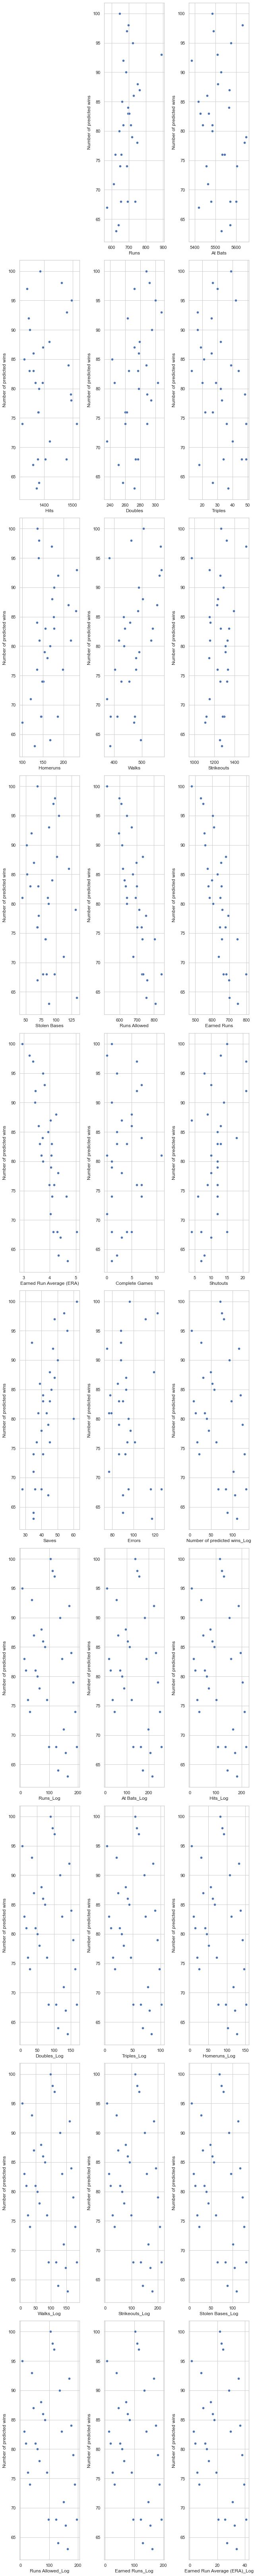

In [32]:
colist=final_dataframe.select_dtypes(include = [np.number]).columns
ncol=3
nrows=10
plt.figure(figsize=(ncol*3, ncol*30))
for x in range(1,len(colist)):
    try:
        sns.set_theme(style='whitegrid')
        plt.subplot(nrows, ncol, x+1)
        sns.scatterplot(final_dataframe[colist[x]], y='Number of predicted wins', data=final_dataframe)
        plt.tight_layout()
    except ValueError:
        continue

# It can be visualized from above scatter plots against outcome vector that log transformed and scaled upto 1 data points are much more correlated with outcome vector than original dataframe. Where log values are increasing with increase in runs, scaling of upto 1 on original dataset is showing strong to moderate movement on either side. The original dataframe seems to be weakly correlated and has scattered data points, hence, making it difficult to draw decision boundary.

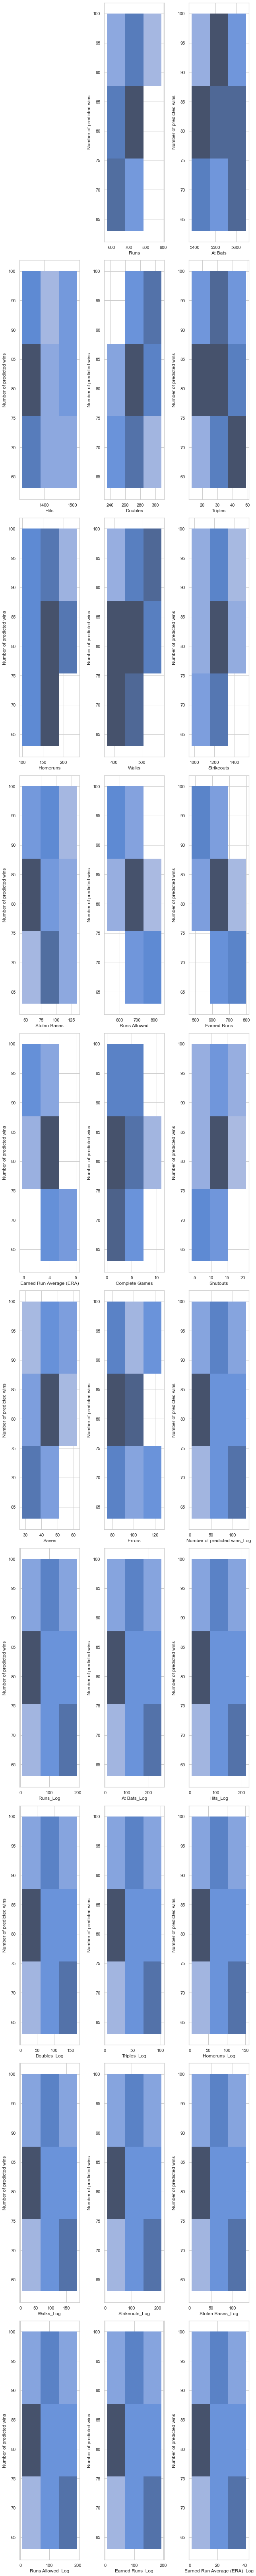

In [194]:
colist=final_dataframe.select_dtypes(include = [np.number]).columns
ncol=3
nrows=10
plt.figure(figsize=(ncol*3, ncol*30))
for x in range(1,len(colist)):
    try:
        sns.set_theme(style='whitegrid')
        plt.subplot(nrows, ncol, x+1)
        sns.histplot(x=colist[x], y='Number of predicted wins', data=final_dataframe, bins=3)
        plt.tight_layout()
    except ValueError:
        continue

# The above histograms show frequency distribution of features agains label. It is divided into 3 bins. Most of the features (including, runs, at bats, etcetera) are skewed to right. There does not appear left skewness. Many datapoints, like, Runs_Log, Double_Log, etcetera seem to be close to normal with skewness threshold within +/-0.65.

In [33]:
final_dataframe.corr()

,Number of predicted wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,...,Walks_Log_pct_change,Strikeouts_Log_pct_change,Stolen Bases_Log_pct_change,Runs Allowed_Log_pct_change,Earned Runs_Log_pct_change,Earned Run Average (ERA)_Log_pct_change,Complete Games_Log_pct_change,Shutouts_Log_pct_change,Saves_Log_pct_change,Errors_Log_pct_change
Number of predicted wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,...,0.215997,0.213567,0.210840,0.209399,0.209187,0.195490,0.123347,0.223736,0.222669,0.212526
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,...,0.144430,0.138434,0.146095,0.139107,0.139088,0.135202,0.053625,0.126702,0.142240,0.140102
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,...,-0.000064,0.002633,0.004246,0.005283,0.005542,0.016132,-0.099785,-0.001929,0.001773,0.006878
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,...,0.135116,0.132932,0.145206,0.136535,0.136684,0.143482,0.104308,0.130922,0.131434,0.135049
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,...,0.318068,0.309232,0.329926,0.309915,0.309429,0.299075,0.390120,0.304736,0.310878,0.311648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Earned Run Average (ERA)_Log_pct_change,0.195490,0.135202,0.016132,0.143482,0.299075,0.257138,-0.119901,-0.214596,-0.397570,-0.010644,...,0.998575,0.999273,0.997086,0.999347,0.999389,1.000000,0.804233,0.996874,0.998728,0.999027
Complete Games_Log_pct_change,0.123347,0.053625,-0.099785,0.104308,0.390120,0.150171,-0.181826,-0.013101,-0.373697,0.007504,...,0.827607,0.817861,0.840802,0.820096,0.819415,0.804233,1.000000,0.790014,0.817552,0.820594
Shutouts_Log_pct_change,0.223736,0.126702,-0.001929,0.130922,0.304736,0.263027,-0.125124,-0.210942,-0.384722,-0.002038,...,0.995807,0.996820,0.993334,0.996336,0.996373,0.996874,0.790014,1.000000,0.995753,0.995676
Saves_Log_pct_change,0.222669,0.142240,0.001773,0.131434,0.310878,0.234442,-0.106457,-0.192936,-0.391578,-0.019956,...,0.999577,0.999730,0.998582,0.999688,0.999693,0.998728,0.817552,0.995753,1.000000,0.999677


# The above table represents correlation among dataset. There seems some multicollinearity due to presence of Hits and Doubles that show strong correlation with At Bats and Runs respectively. Runs represent moderate to strong multicollinearity with most of the features in the original dataset.

# Graphical Representation Of Correlation Of Features With Label

In [30]:
pd.DataFrame((final_dataframe.corr()['Number of predicted wins'])).iplot(title='Correlation Of Variables With Label')

# The above iplot represents correlation of features with label. Correlation of features with labe is of high relevance. The stronger the relationship of label with axis, the more accurate the prediction. In the above line graph:

1. Highest correlation with labe is observed to be 67%, that is shared with saves. Maximum peaks and troughs are observed in log transformation of dataset. Minimum correlation is -3%, shared with Completed Games Log Percentage Change.

2. Weak Positive To Strong Positive Relationship Is Found Among Followiing Features:

Hits	0.03761244412299146

Runs_norm_pct_change	0.06373079680542612

Complete Games	0.08053343684000255

Strikeouts	0.11184973144299913

Earned Run Average (ERA)_Log_pct_change	0.195489946592648

Triples_Log_pct_change	0.20204822677830264

Earned Runs_Log_pct_change	0.2091867699795501

Runs Allowed_Log_pct_change	0.20939898639460133

Stolen Bases_Log_pct_change	0.21084039929893794

Hits_Log_pct_change	0.21247376652455435

Errors_Log_pct_change	0.21252592507628876

At Bats_Log_pct_change	0.21272813877504135

Strikeouts_Log_pct_change	0.2135672417713439

Doubles_Log_pct_change	0.21384137988926136

Runs_Log_pct_change	0.21524501111095

Walks_Log_pct_change	0.21599718172584648

Homeruns_Log_pct_change	0.21843408415129492

Number of predicted wins_Log_pct_change	0.2211149078833727

Saves_Log_pct_change	0.2226688380171592

Shutouts_Log_pct_change	0.22373632347182834

Homeruns_norm_pct_change	0.23634375940051877

Homeruns	0.3074073773725719

Walks_norm_pct_change	0.3105765409059459

Shutouts_norm_pct_change	0.33660085064133277

Strikeouts_norm_pct_change	0.35161044045948947

Saves_norm_pct_change	0.4219282726655574

Doubles	0.4277968699590264

Runs	0.430750532531272

Shutouts	0.4718051614896539

Walks	0.4843416952504986

Number of predicted wins_norm_pct_change	0.5703106832640595

Saves	0.6665296188226413


2. Weak Negative To Strong Negative Relationship Is Found Among Following Features:

Earned Run Average (ERA)	-0.8195997123159472

Runs Allowed	-0.812951900423691

Earned Runs	-0.8094347520763396

Earned Run Average (ERA)_norm_pct_change	-0.5187701124623487

Earned Runs_norm_pct_change	-0.5167728417758227

Runs Allowed_norm_pct_change	-0.506055834892959

Triples_norm_pct_change	-0.4360804538139645

At Bats_norm_pct_change	-0.42725864533138486

Hits_norm_pct_change	-0.3398241828521804

Earned Run Average (ERA)_Log	-0.3005264239035453

Stolen Bases_Log	-0.29933094874197447

Triples_Log	-0.2982417536744813

Earned Runs_Log	-0.2979526588271085

Runs Allowed_Log	-0.29794947919905573

Strikeouts_Log	-0.2975637672189702

At Bats_Log	-0.29730578396979307

Errors_Log	-0.29723020633491387

Hits_Log	-0.29718304055821076

Doubles_Log	-0.2968086710352647

Runs_Log	-0.29658727294586923

Walks_Log	-0.29648901346997025

Saves_Log	-0.29583979733109284

Homeruns_Log	-0.2953241559451491

Number of predicted wins_Log	-0.2953233068884834

Shutouts_Log	-0.29270811931361607

Errors_norm_pct_change	-0.2567065846728607

Triples	-0.2511177282749156

Stolen Bases_norm_pct_change	-0.23843462267730492

Stolen Bases	-0.15723407818337548

Doubles_norm_pct_change	-0.11184269374937698

Errors	-0.08948461968513508

At Bats	-0.08794663528381153

Complete Games_Log	-0.07774388766225503

Complete Games_Log_pct_change	-0.02857186012149767

Complete Games_norm_pct_change	-0.01990393081051136

3. Correlation Of Label with itself is of no relevance

# Mathematical Notation:
Correlation (X, Y) = (Covariance Of X and Covariance Of Y)/(Std Of X and Std Of Y)

# Correlation Heatmaps Of Individual Datasets

# Correlation Heatmap Of Original Dataset

<AxesSubplot:>

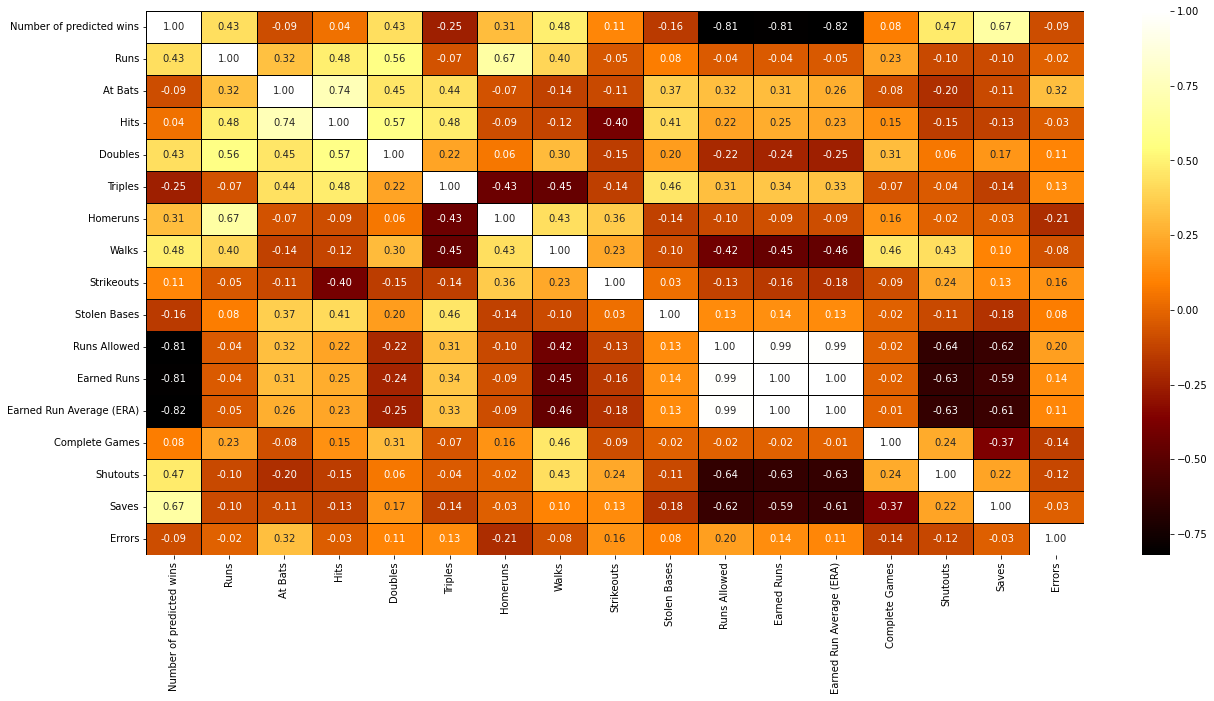

In [49]:
plt.figure(figsize=(21,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, linecolor='black', fmt='.2f', cmap='afmhot')

# Verbal Translation Of Above Graph:
1. Label has strong negative relationship with 3 features:

i. Runs Allowed

ii. Earned Runs

iii. Earned Runs Average (ERA)

2. Label has strong positive relationship with 1 feature:

i. Saves

3. Strong Multicollinearity is detected among 5 features:

i. Runs Allowed

ii. Earned Runs

iii. Earned Runs Average (ERA)

iv. Shutouts

v. Saves

4. Multicollinearity seems to be moderate among all other data points.

# Correlation Heatmap Of Log Transformed Dataset

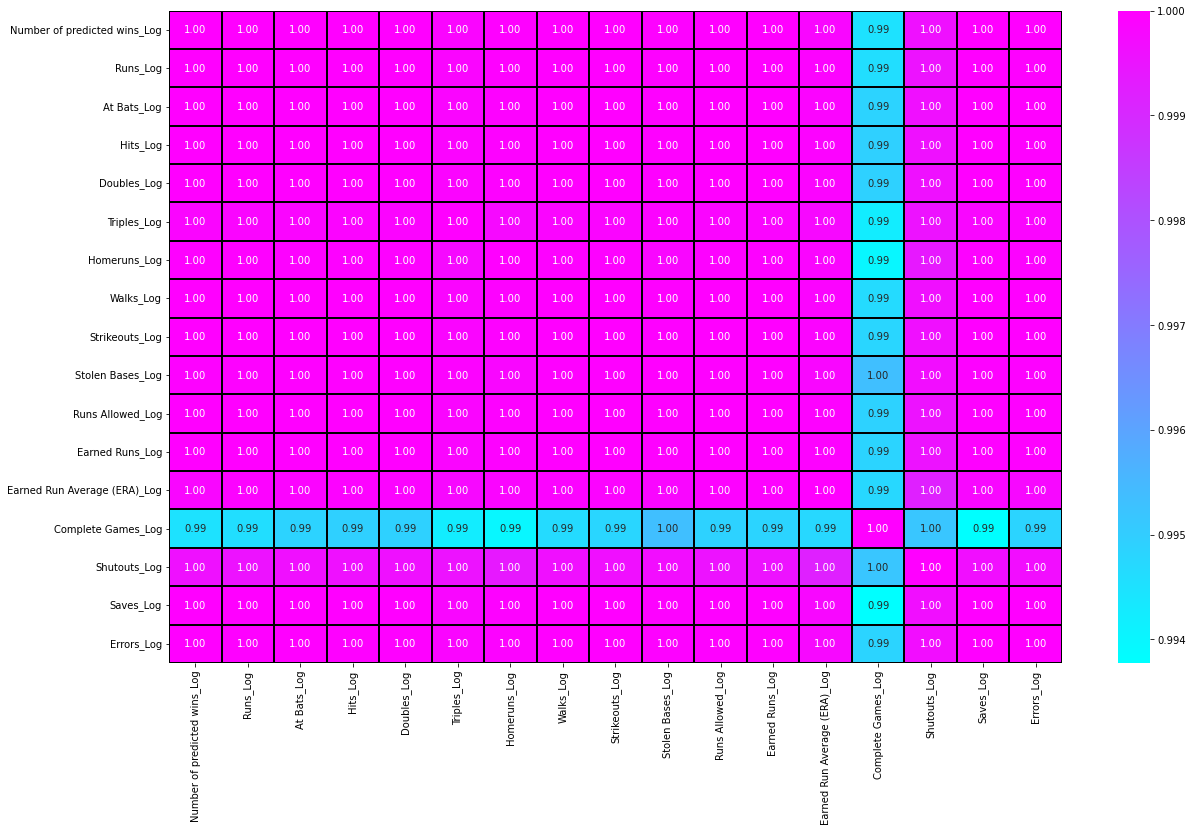

In [50]:
plt.figure(figsize=(20,12))
sns.heatmap(log_data.corr(), annot=True, linewidths=0.3, linecolor='black', fmt='.2f', cmap='cool')
plt.show()

# Verbal Translation Of Above Graph:
    
1. There is strong positive to perfect positive correlation with labels among all the features.

2. There is high multicollinearity among all data points.

Data Handling Conclusion:

This is a standalone heatmap of only log transformed dataset. I have analyzed there correlation on wholedatset and there multicollinearity seems modest. Hence, I will not remove any feature based on this.
    

# Correlation Heatmap Of Percentage Change On Original Dataset

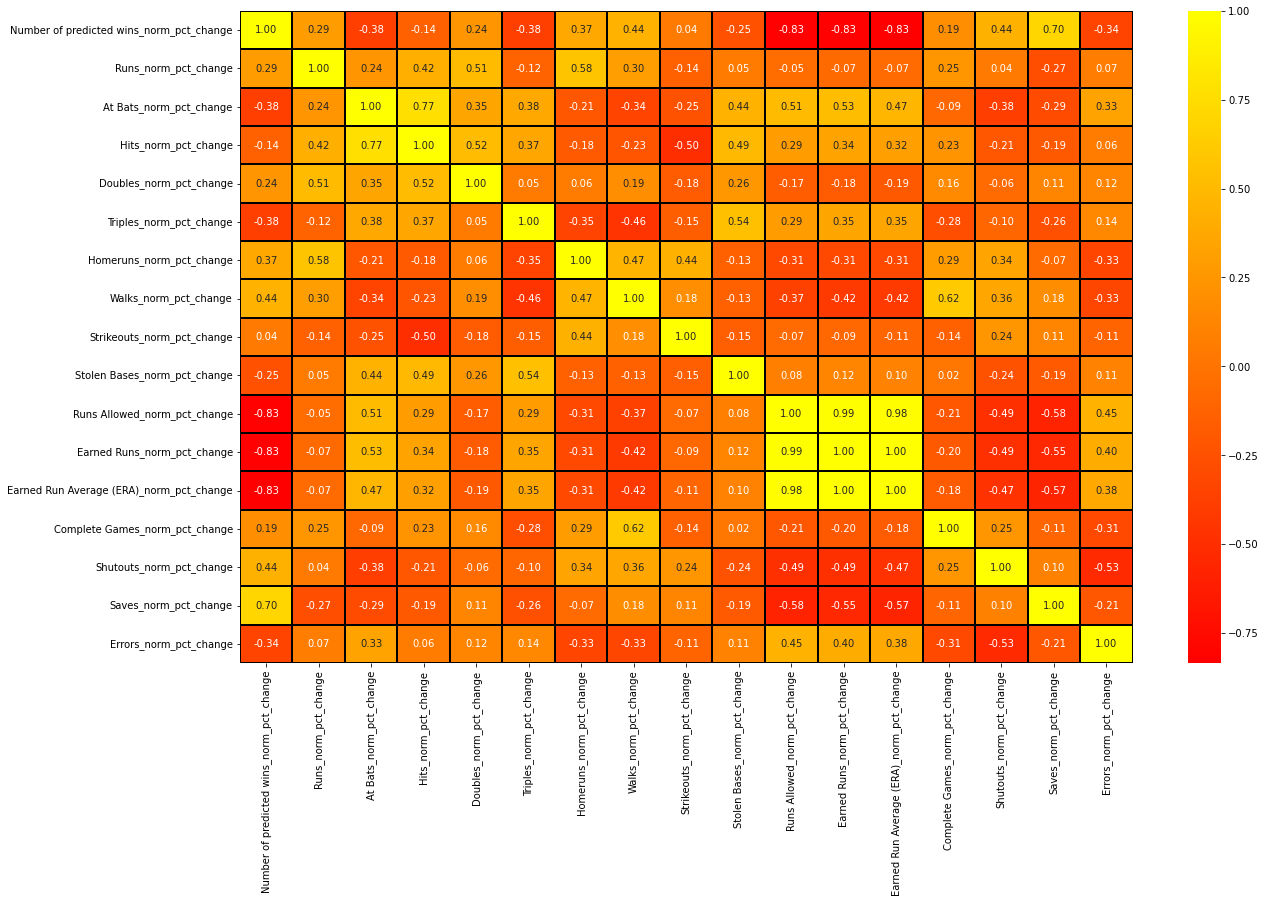

In [51]:
plt.figure(figsize=(20,12))
sns.heatmap(norm_pct_change.corr(), annot=True, linewidths=0.3, linecolor='black', fmt='.2f', cmap='autumn')
plt.show()

# Verbal Translation Of Above Graph:
Label has strong negative relationship with 3 features:
i. Runs Allowed

ii. Earned Runs

iii. Earned Runs Average (ERA)

Label has strong positive relationship with 1 feature:
i. Saves

Strong to Perfect Multicollinearity is detected among 5 features:
i. Runs Allowed

ii. Earned Runs

iii. Earned Runs Average (ERA)

iv. Shutouts

v. Saves

Multicollinearity seems to be moderate among all other data points

Dataset Handling:

1. Overall, this dataset reveals higher correlation of most of the features with labels than original dataset. Hence, all merged can give a better understanding of label.

2. This is a standalone heatmap of only 1 day percentage change on original dataset. I have analyzed there correlation on wholedatset and there multicollinearity seems modest. Hence, I will not remove any feature based on this.

# Correlation Heatmap Of Percentage Over 1 day Period On Log Transformed Dataset

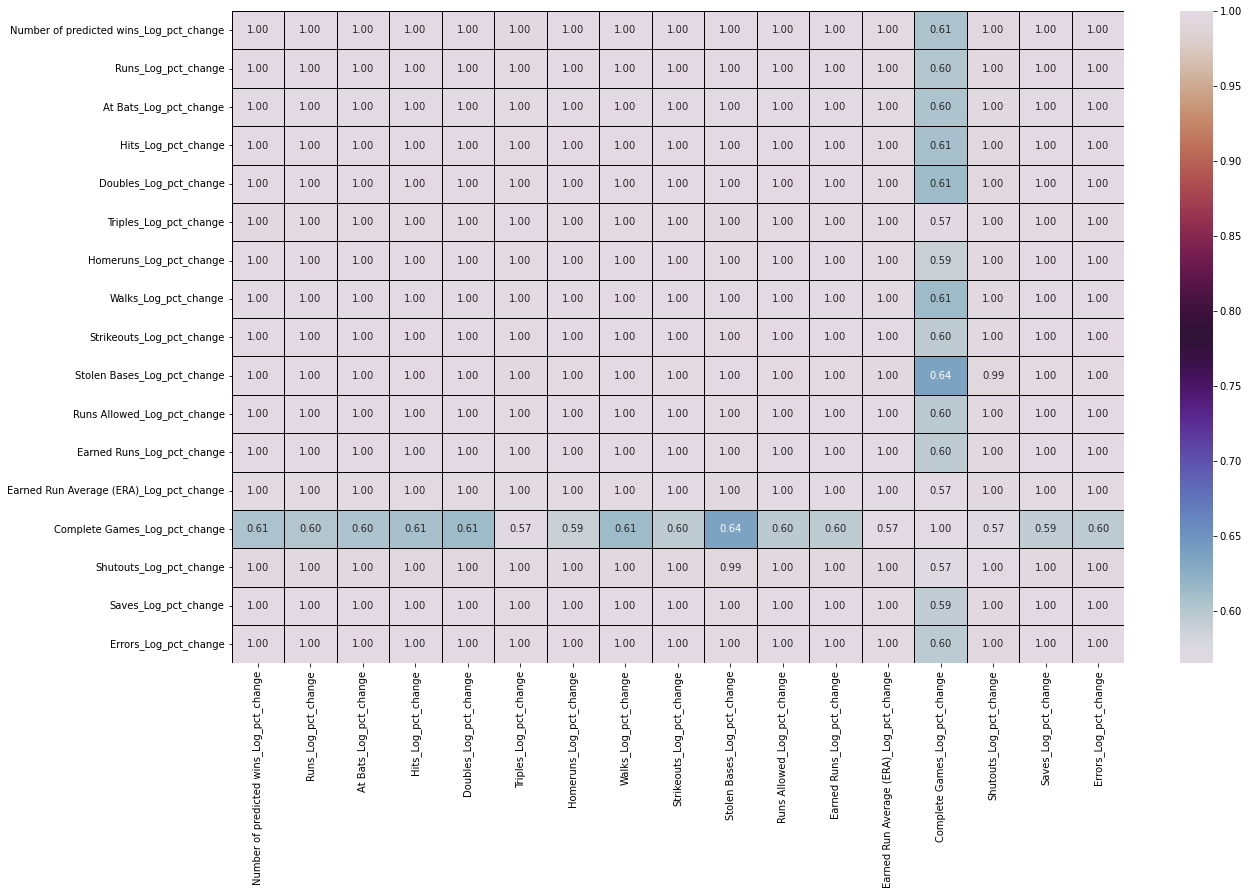

In [52]:
plt.figure(figsize=(20,12))
sns.heatmap(log_pct_change.corr(), annot=True, linewidths=0.5, linecolor='black', fmt='.2f', cmap='twilight')
plt.show()

# Verbal Translation Of Above Graph:
There is strong positive to perfect positive correlation with labels among all the features.

There is high to perfect multicollinearity among all data points.

Data Handling Conclusion:

This is a standalone heatmap of only 1 day percentage change on log transformed dataset. I have analyzed there correlation on wholedatset and there multicollinearity seems modest. Hence, I will not remove any feature based on this.

# Dataset Information Table

In [34]:
final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 68 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Number of predicted wins                  30 non-null     int64  
 1   Runs                                      30 non-null     int64  
 2   At Bats                                   30 non-null     int64  
 3   Hits                                      30 non-null     int64  
 4   Doubles                                   30 non-null     int64  
 5   Triples                                   30 non-null     int64  
 6   Homeruns                                  30 non-null     int64  
 7   Walks                                     30 non-null     int64  
 8   Strikeouts                                30 non-null     int64  
 9   Stolen Bases                              30 non-null     int64  
 10  Runs Allowed                            

# The above table reprents information dataset:
    
i. Columns

ii. Count Of Non Null Data Points

iii. Values data type for each columns

iv. Count of data types in iii.

v. Memory Usage

It can be deduced that the dataset has 30 rows and each columns has no missing values. The datatype used are float64 and int64. There 52 float64 columns and 16 int64 columns. Memory usage is 16.1 KB.

In [35]:
data.select_dtypes(include = [np.number]).columns

Index(['Number of predicted wins', 'Runs', 'At Bats', 'Hits', 'Doubles',
       'Triples', 'Homeruns', 'Walks', 'Strikeouts', 'Stolen Bases',
       'Runs Allowed', 'Earned Runs', 'Earned Run Average (ERA)',
       'Complete Games', 'Shutouts', 'Saves', 'Errors'],
      dtype='object')

# The above code cell highlights all numberic values, that will be used to derive following graphs.

# Box Plot To Detect Outliers

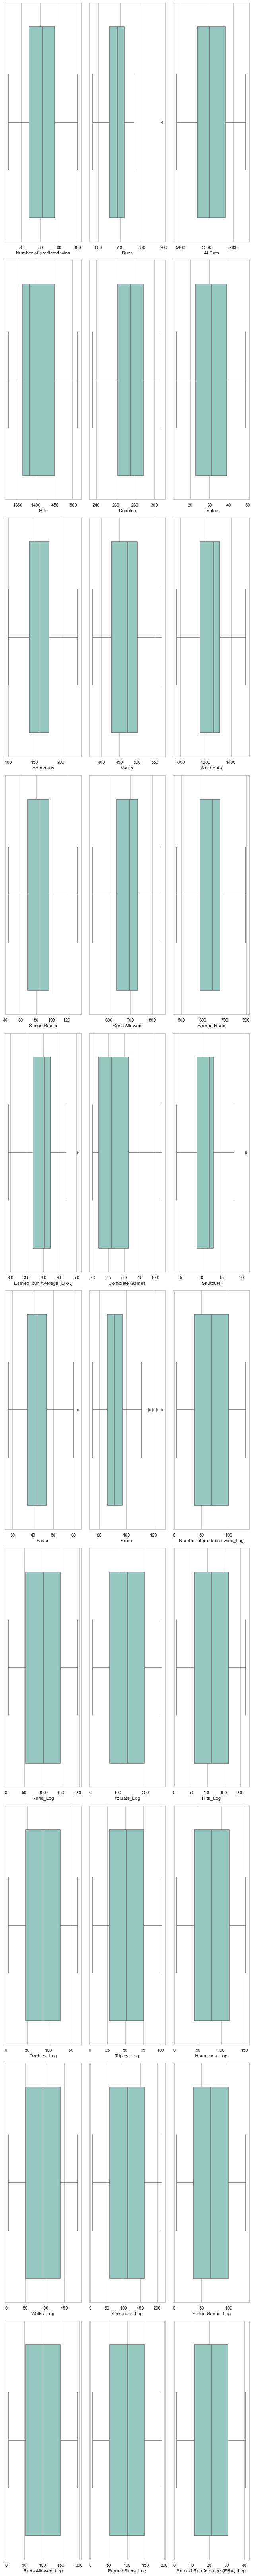

In [55]:
for x in range(1,len(colist)):
    try:
        sns.set_theme(style='whitegrid')
        plt.subplot(nrows, ncol, x+1)
        sns.boxplot(x=colist[x], y='Number of predicted wins', data=final_dataframe, bins=3)
        plt.tight_layout()
    except ValueError:
        continue

# Verbal Translation Of Above Graph
1. The data is mostly free of outliers.

2. A few outliers are detected in:

i. Runs

ii. Earned Runs Average (ERA)

iii. Saves

iv. Shutouts

v. Errors

# Descriptive Statistics

In [36]:
description=final_dataframe.describe()
description

,Number of predicted wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,...,Walks_Log_pct_change,Strikeouts_Log_pct_change,Stolen Bases_Log_pct_change,Runs Allowed_Log_pct_change,Earned Runs_Log_pct_change,Earned Run Average (ERA)_Log_pct_change,Complete Games_Log_pct_change,Shutouts_Log_pct_change,Saves_Log_pct_change,Errors_Log_pct_change
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,...,0.167891,0.168585,0.159107,0.166432,0.166297,0.170059,0.165040,0.179559,0.159696,0.165607
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,...,0.254768,0.257498,0.228394,0.251640,0.251394,0.263767,0.399647,0.294136,0.233650,0.246972
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,...,0.033423,0.034638,0.035923,0.035628,0.035781,0.036237,0.000000,0.020016,0.032928,0.034617
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,...,0.044941,0.045731,0.044264,0.045915,0.046000,0.047035,0.000000,0.046787,0.044566,0.044469
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,...,0.069590,0.068807,0.068956,0.067927,0.067723,0.066693,0.000000,0.080955,0.070002,0.071860
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,...,0.135962,0.140673,0.128305,0.138072,0.138284,0.138346,0.000000,0.134996,0.142712,0.135686
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,...,1.022943,1.038029,0.914758,1.013624,1.012969,1.066267,1.729716,1.194988,0.945672,0.994865


In [37]:
lst=description.columns.to_list()
print(lst)

['Number of predicted wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs', 'Earned Run Average (ERA)', 'Complete Games', 'Shutouts', 'Saves', 'Errors', 'Number of predicted wins_Log', 'Runs_Log', 'At Bats_Log', 'Hits_Log', 'Doubles_Log', 'Triples_Log', 'Homeruns_Log', 'Walks_Log', 'Strikeouts_Log', 'Stolen Bases_Log', 'Runs Allowed_Log', 'Earned Runs_Log', 'Earned Run Average (ERA)_Log', 'Complete Games_Log', 'Shutouts_Log', 'Saves_Log', 'Errors_Log', 'Number of predicted wins_norm_pct_change', 'Runs_norm_pct_change', 'At Bats_norm_pct_change', 'Hits_norm_pct_change', 'Doubles_norm_pct_change', 'Triples_norm_pct_change', 'Homeruns_norm_pct_change', 'Walks_norm_pct_change', 'Strikeouts_norm_pct_change', 'Stolen Bases_norm_pct_change', 'Runs Allowed_norm_pct_change', 'Earned Runs_norm_pct_change', 'Earned Run Average (ERA)_norm_pct_change', 'Complete Games_norm_pct_change', 'Shutouts_norm_pct_change', 'S

In [38]:
lst1=[]
for x in range(len(lst)):
    lst1.append([description.iloc[6,x]-description.iloc[5,x]])
len(lst1), print(lst1)

[[6.75], [29.25], [60.0], [69.0], [13.25], [8.0], [18.5], [28.25], [50.0], [13.0], [37.0], [34.75], [0.19500000000000028], [2.75], [1.0], [4.75], [5.75], [31.956314524611628], [47.1599286943472], [62.45693474192228], [52.43534845197078], [40.64081933601078], [23.515834753454996], [36.58094226909758], [44.73985045368255], [52.03993537122102], [32.09830527539418], [46.92144534130881], [46.26433904316313], [9.399432967389163], [0.0], [18.056535260889007], [27.460085883847555], [33.28412575441489], [0.04491441020852782], [0.08079237566548209], [0.019790422975643263], [0.03603887940118938], [0.05978520728663672], [0.16697573260073262], [0.10777334794267512], [0.09353825225959506], [0.09258813182278591], [0.22508887606297695], [0.04675634873660367], [0.02946907239153429], [0.033483815153134144], [0.5416666666666667], [0.3894230769230768], [0.21968157181571818], [0.07746094534740233], [0.06829272222423188], [0.06928510587759346], [0.06918903330023551], [0.0686954373000862], [0.066169976147588

(68, None)

In [39]:
lst1_frame=pd.DataFrame(data=lst1, index=lst, columns=['IQR'])
lst1_frame=lst1_frame.T
lst1_frame

,Number of predicted wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,...,Walks_Log_pct_change,Strikeouts_Log_pct_change,Stolen Bases_Log_pct_change,Runs Allowed_Log_pct_change,Earned Runs_Log_pct_change,Earned Run Average (ERA)_Log_pct_change,Complete Games_Log_pct_change,Shutouts_Log_pct_change,Saves_Log_pct_change,Errors_Log_pct_change
IQR,6.75,29.25,60.0,69.0,13.25,8.0,18.5,28.25,50.0,13.0,...,0.066373,0.071866,0.059349,0.070146,0.070561,0.071653,0.0,0.054041,0.07271,0.063826


In [40]:
lst3=[]
for x in range(len(lst)):
    lst3.append([description.iloc[7,x]-description.iloc[3,x]])
len(lst3), print(lst3)

[[37.0], [318.0], [264.0], [191.0], [72.0], [36.0], [132.0], [195.0], [545.0], [90.0], [319.0], [321.0], [2.1], [11.0], [17.0], [34.0], [51.0], [127.0223797958759], [189.338156735157], [249.83528669905047], [210.06756222626686], [162.70641271644962], [97.80213295966905], [147.45328658726876], [178.36128512960553], [206.90095743947012], [127.00820578407081], [189.3997660211231], [187.07064385707469], [39.74901552628317], [10.720532369752311], [68.56675363696426], [108.38726091816173], [131.62798800925017], [0.7695573074590663], [0.43571499546342307], [0.06741450036020868], [0.230857973687297], [0.2897741135981302], [2.7299843014128733], [0.8584577393646875], [0.7590475231671245], [0.4729256004063743], [1.5966757123473543], [0.492006443578081], [0.52920473101196], [0.563664596273292], [6.0], [2.666666666666667], [1.5920634920634922], [0.6993998908892526], [0.9372155597065421], [0.9591349644177465], [0.9632074732720919], [0.9510171299912833], [0.9515361309025745], [0.9760725072997818], [0

(68, None)

In [41]:
lst3_frame=pd.DataFrame(data=lst3, index=lst, columns=['Range'])
lst3_frame=lst3_frame.T
lst3_frame

,Number of predicted wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,...,Walks_Log_pct_change,Strikeouts_Log_pct_change,Stolen Bases_Log_pct_change,Runs Allowed_Log_pct_change,Earned Runs_Log_pct_change,Earned Run Average (ERA)_Log_pct_change,Complete Games_Log_pct_change,Shutouts_Log_pct_change,Saves_Log_pct_change,Errors_Log_pct_change
Range,37.0,318.0,264.0,191.0,72.0,36.0,132.0,195.0,545.0,90.0,...,0.989519,1.003391,0.878835,0.977996,0.977188,1.03003,1.729716,1.174972,0.912744,0.960249


In [42]:
lst5=pd.DataFrame(data=final_dataframe.skew().to_list(), index=lst, columns=['Skewness'])
lst5=lst5.T
lst6=pd.DataFrame(data=final_dataframe.kurtosis().to_list(), index=lst, columns=['Kurtosis'])
lst6=lst6.T
lst5, lst6

(          Number of predicted wins      Runs   At Bats      Hits  Doubles  \
 Skewness                  0.047089  1.200786  0.183437  0.670254 -0.23065   
 
            Triples  Homeruns     Walks  Strikeouts  Stolen Bases  ...  \
 Skewness  0.129502  0.516441  0.158498   -0.156065      0.479893  ...   
 
           Walks_Log_pct_change  Strikeouts_Log_pct_change  \
 Skewness              2.835745                   2.871276   
 
           Stolen Bases_Log_pct_change  Runs Allowed_Log_pct_change  \
 Skewness                     2.742108                     2.849079   
 
           Earned Runs_Log_pct_change  Earned Run Average (ERA)_Log_pct_change  \
 Skewness                    2.850988                                 2.906031   
 
           Complete Games_Log_pct_change  Shutouts_Log_pct_change  \
 Skewness                       2.859263                 3.037973   
 
           Saves_Log_pct_change  Errors_Log_pct_change  
 Skewness              2.836361               2.827334  
 


In [43]:
description1=pd.concat([description, lst1_frame, lst3_frame, lst5, lst6])
description1

,Number of predicted wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,...,Walks_Log_pct_change,Strikeouts_Log_pct_change,Stolen Bases_Log_pct_change,Runs Allowed_Log_pct_change,Earned Runs_Log_pct_change,Earned Run Average (ERA)_Log_pct_change,Complete Games_Log_pct_change,Shutouts_Log_pct_change,Saves_Log_pct_change,Errors_Log_pct_change
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.200000,83.500000,...,0.167891,0.168585,0.159107,0.166432,0.166297,0.170059,0.165040,0.179559,0.159696,0.165607
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.759470,22.815225,...,0.254768,0.257498,0.228394,0.251640,0.251394,0.263767,0.399647,0.294136,0.233650,0.246972
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,...,0.033423,0.034638,0.035923,0.035628,0.035781,0.036237,0.000000,0.020016,0.032928,0.034617
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.500000,69.000000,...,0.044941,0.045731,0.044264,0.045915,0.046000,0.047035,0.000000,0.046787,0.044566,0.044469
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.500000,83.500000,...,0.069590,0.068807,0.068956,0.067927,0.067723,0.066693,0.000000,0.080955,0.070002,0.071860
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.500000,96.500000,...,0.135962,0.140673,0.128305,0.138072,0.138284,0.138346,0.000000,0.134996,0.142712,0.135686
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.000000,134.000000,...,1.022943,1.038029,0.914758,1.013624,1.012969,1.066267,1.729716,1.194988,0.945672,0.994865
IQR,6.750000,29.250000,60.000000,69.000000,13.250000,8.000000,18.500000,28.250000,50.000000,13.000000,...,0.066373,0.071866,0.059349,0.070146,0.070561,0.071653,0.000000,0.054041,0.072710,0.063826
Range,37.000000,318.000000,264.000000,191.000000,72.000000,36.000000,132.000000,195.000000,545.000000,90.000000,...,0.989519,1.003391,0.878835,0.977996,0.977188,1.030030,1.729716,1.174972,0.912744,0.960249


# Graphical Representation Of Above Table

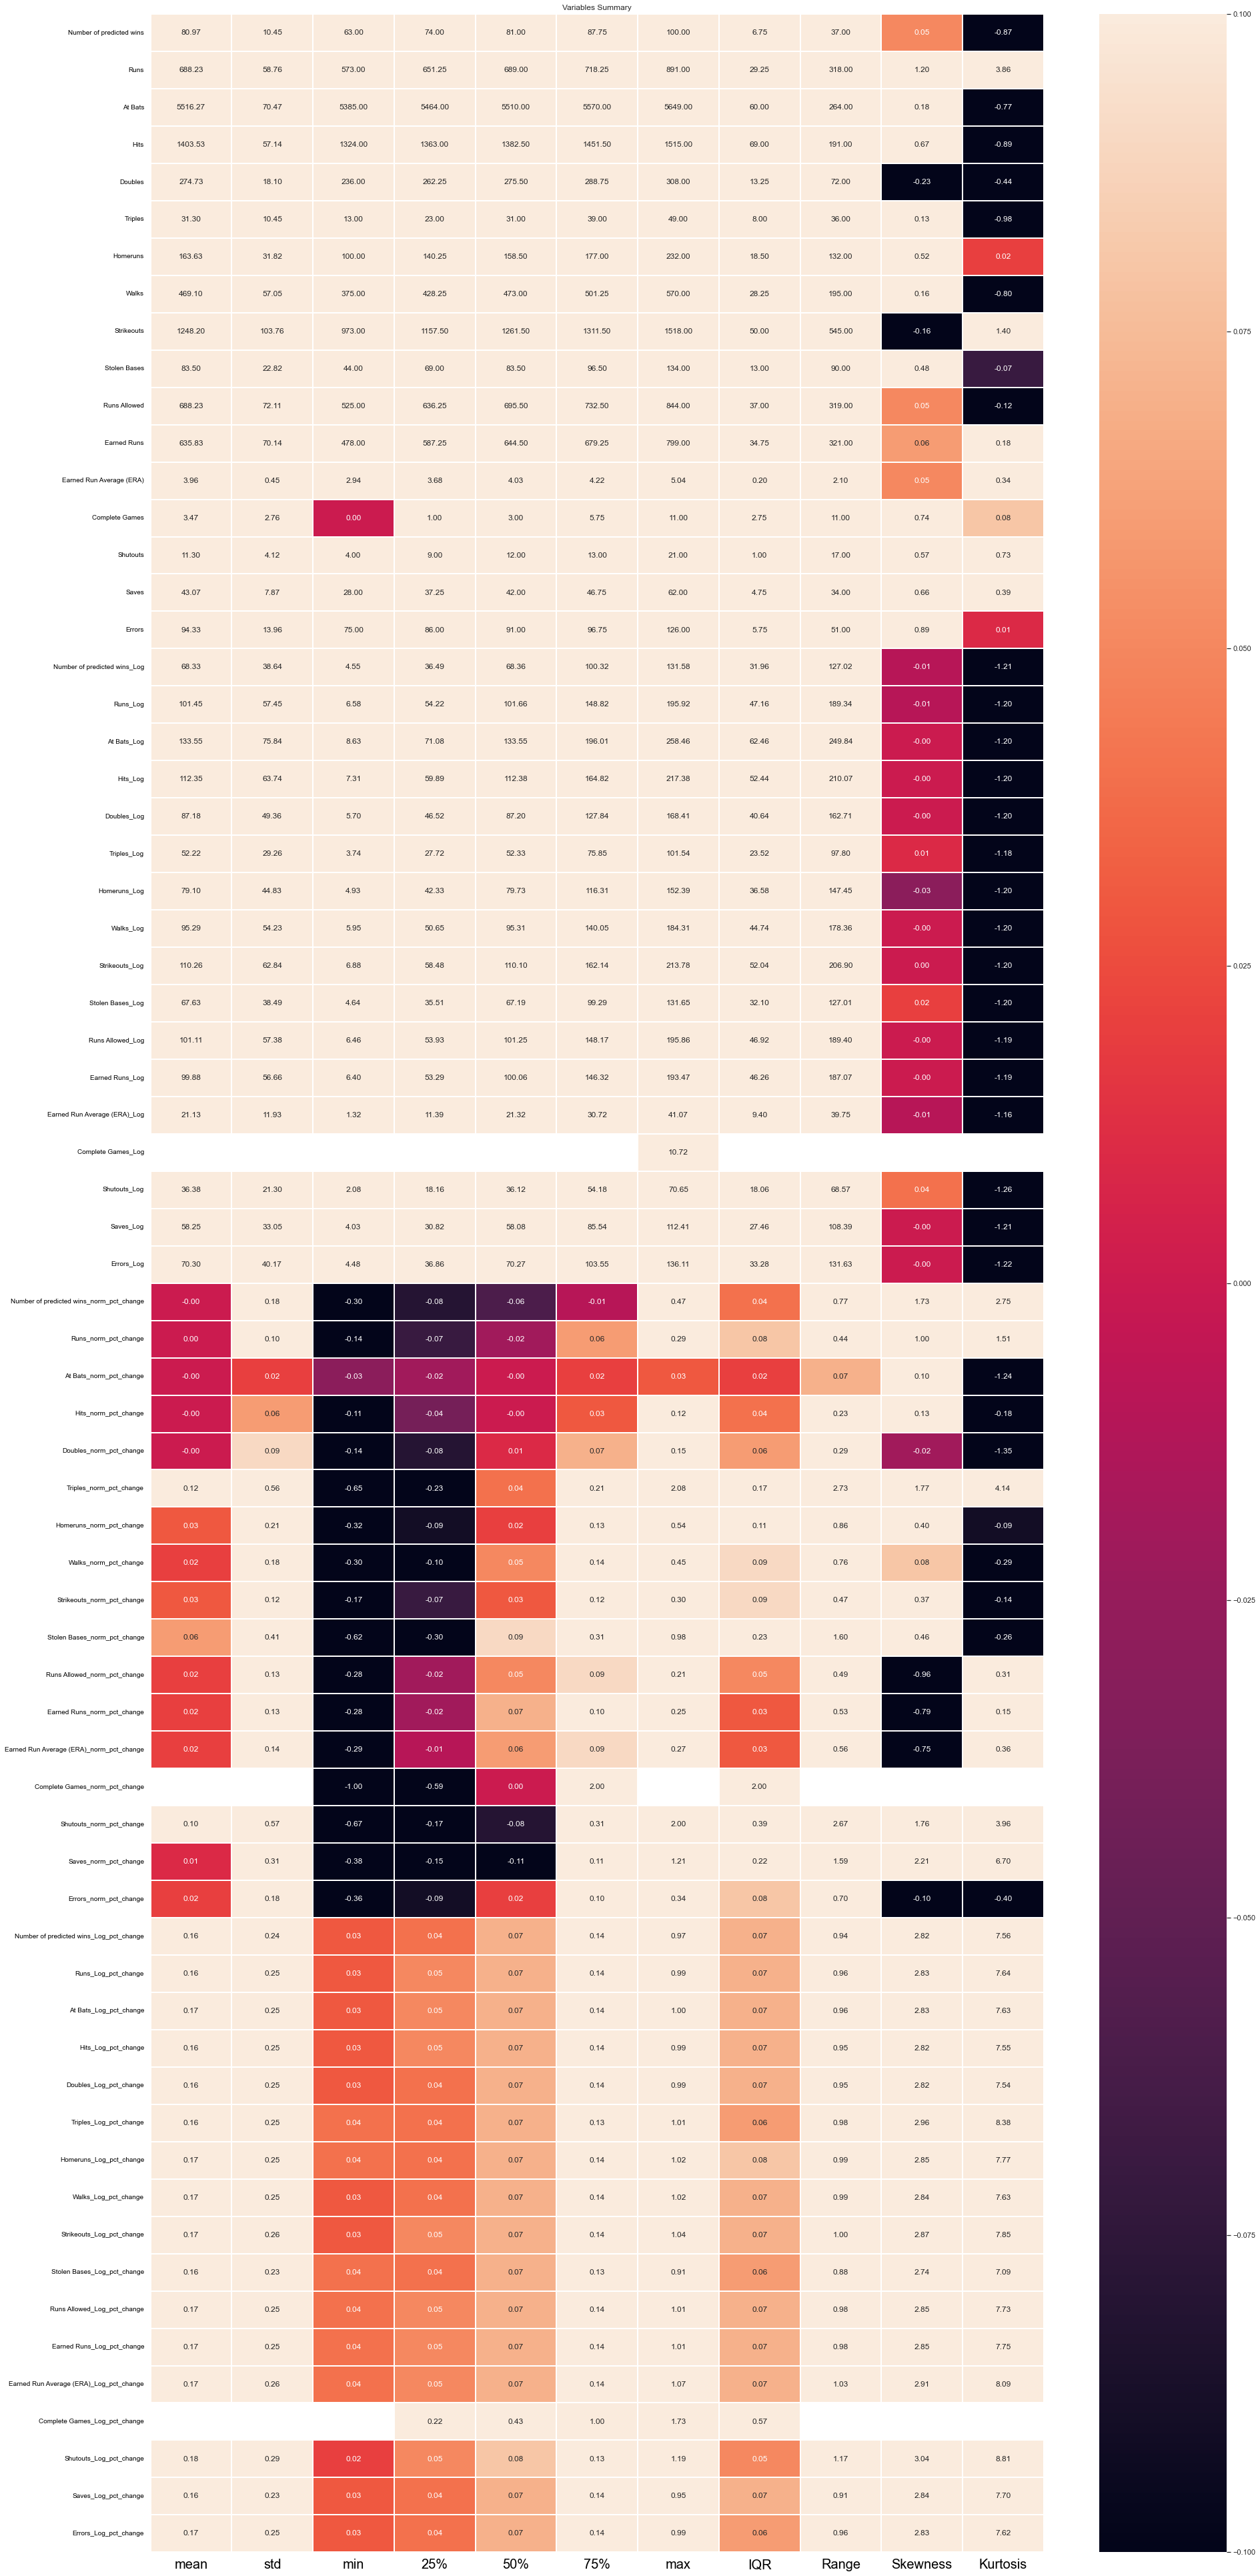

In [64]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(30,70))
sns.heatmap(round(description1[1:].transpose(),2), linewidth=2, annot=True, fmt='.2f', square=False, color='Black')
plt.xticks(fontsize=20, color='black')
plt.yticks(fontsize=10, color='black')
plt.title('Variables Summary')
plt.show()

# Mathematical Notation:
1. Mean = sum of values/count of values                                                                                     
2. std = sqrt(((value - mean of distribution)**2 / number of values ))                                                                                        
3. 3 quartile are measures of variance, calculated to spot the placeholder value, it returns index of the produced value.
Step 1: sort the dataset                                                                                                   
Step2:                                                                                                                     
i) Lower Quartile (Q1: 25% distribution) = ((number of values+1)/4)th Term                                                 
ii) Middle Quartile (Q2: 50% distribution) = ((number of values +1)/2)th Term                                               
Also, know as median (central value).                                                                                       
iii) Upper Quartile (Q3: 75% distribution) = ¾(number of values + 1)th Term                                                 
iv) IQR = Upper Quartile - Lowe Quartile                                                                                   
4. Range = Maximum Value - Minimum Value                                                                                   
5. Skewness = (sumation(value - mean of distribution)**3)/((number of values - 1) * std**3)                                 
6. Kurtosis = number of values * ((sumation(value - mean of distribution)**4) / std**4)

# Verbal Translation Of Descriptive Table And Graphic
1. For values that are scaled upto 1, mean is mostly around 0 and standard deviation is comparatively low. Hence, making the data much more acceptable by algorithms to process it more accurately.

2. For log values, mean is constantly lesser, hence, reducing outliers in the data.

3. IQR, Range and Skewness and kurtosis are much more condensed in data that is scaled upto 1.

4. Skewness for data scaled upto 1 is close to 0 for most variables, precisely, for data scaled to 1 on original dataset.

5. Acceptable skewness is +/- 0.65 and skewness for bell shaped curve should be 0.

6. Kutosis is upto 3 for data scaled to 1 on original dataset.

7. Kurtosis for bell shaped curve should be 3.

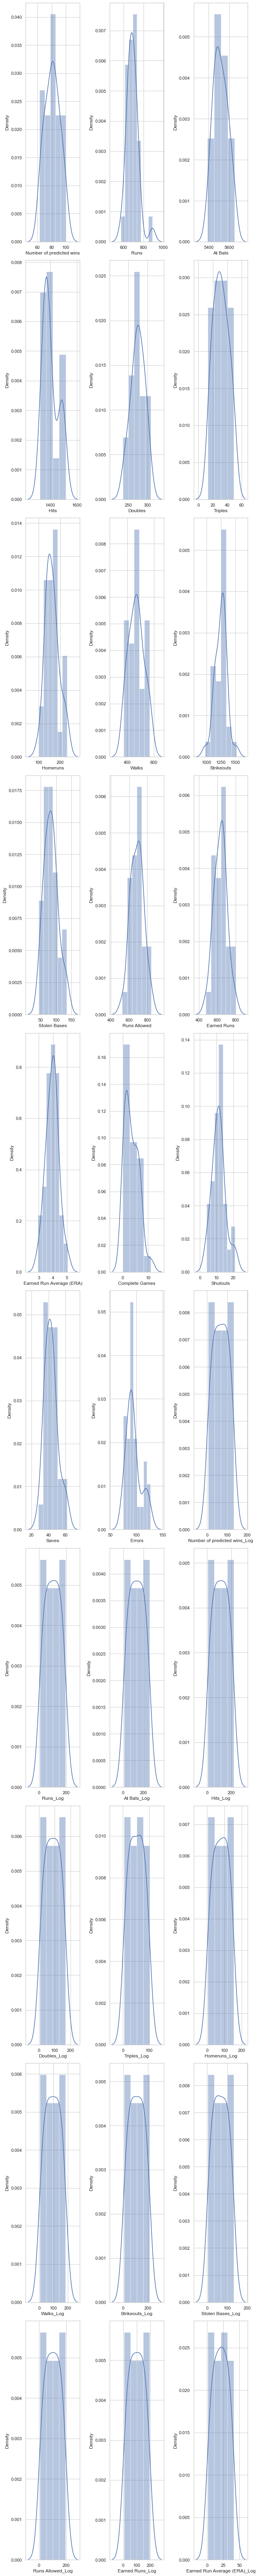

In [65]:
colist=final_dataframe.select_dtypes(include = [np.number]).columns
ncol=3
nrows=10
plt.figure(figsize=(ncol*3, ncol*30))
for x in range(0,len(colist)):
    try:
        sns.set_theme(style='whitegrid')
        plt.subplot(nrows, ncol, x+1)
        sns.distplot(final_dataframe[colist[x]])
        plt.tight_layout()
    except ValueError:
        continue

# Observations
1. Acceptable skewness is +/-0.65 and Right skewness for bell shaped curve is 0

2. Acceptable and Outliers Prone Left skewness is observed in:

Runs Allowed_norm_pct_change	-0.9550345684567753

Earned Runs_norm_pct_change	-0.7888336833627194

Earned Run Average (ERA)_norm_pct_change	-0.7468793581501797

Doubles	-0.23064991757259148

Strikeouts	-0.1560654813644833

Errors_norm_pct_change	-0.10379741412793103

Homeruns_Log	-0.026903080306131616

Doubles_norm_pct_change	-0.017036423631274777

Number of predicted wins_Log	-0.011014080992873411

Runs_Log	-0.008834622094504278

Earned Run Average (ERA)_Log	-0.005856882156519829

Doubles_Log	-0.003978675057751956

Walks_Log	-0.003302579036392238

Saves_Log	-0.0028684601717476

Errors_Log	-0.0024163657169086017

Earned Runs_Log	-0.0014505945936409991

Hits_Log	-0.001390209578369131

Runs Allowed_Log	-0.0011384887383512707

At Bats_Log	-0.00034330466354828766

3. Acceptable And Outliers ProNE Right Skewness is observed in:

Strikeouts_Log	0.001101226538869255

Triples_Log	0.011957392953463325

Stolen Bases_Log	0.016763462141412794

Shutouts_Log	0.03911921894927527

Runs Allowed	0.04573397531336112

Number of predicted wins	0.047088688953686085

Earned Run Average (ERA)	0.053331339494040286

Earned Runs	0.05870979570981254

Walks_norm_pct_change	0.08154099625098007

At Bats_norm_pct_change	0.10107842679424164

Triples	0.129502450836424

Hits_norm_pct_change	0.1312292333400505

Walks	0.15849848440330838

At Bats	0.18343655908507983

Strikeouts_norm_pct_change	0.3729950238762064

Homeruns_norm_pct_change	0.3983853219999791

Stolen Bases_norm_pct_change	0.4551011406445188

Stolen Bases	0.4798928679573835
Homeruns	0.5164407366297173

Shutouts	0.5657904298216165

Saves	0.6575235461553925

Hits	0.6702537173217267

Complete Games	0.7368452725826206

Errors	0.8901318267689016

Runs_norm_pct_change	0.9989704892995536

Runs	1.2007863569707353

Number of predicted wins_norm_pct_change	1.725887081588015

Shutouts_norm_pct_change	1.7565630589373746

Triples_norm_pct_change	1.7720072538347722

Saves_norm_pct_change	2.2112549234712837

Stolen Bases_Log_pct_change	2.7421079404093898

Hits_Log_pct_change	2.8176037152368045

Number of predicted wins_Log_pct_change	2.8185684486208284

Doubles_Log_pct_change	2.8186398081266635

Errors_Log_pct_change	2.827334198902717

Runs_Log_pct_change	2.832083969031683

At Bats_Log_pct_change	2.833066858841281

Walks_Log_pct_change	2.83574520039546

Saves_Log_pct_change	2.836361420677046

Runs Allowed_Log_pct_change	2.8490794052378057

Homeruns_Log_pct_change	2.8502794337328945

Earned Runs_Log_pct_change	2.850988205182696

Strikeouts_Log_pct_change	2.8712763979150973

Earned Run Average (ERA)_Log_pct_change	2.906031401102567

Triples_Log_pct_change	2.9611927446002295

Shutouts_Log_pct_change	3.037972760681166

# Conclusion:
Based On EDA done above in two parts, I am romving 3 columns, as part of Error Removal And Data Handling:

Runs Allowed_norm_pct_change

Earned Runs_norm_pct_change

Earned Run Average (ERA)_norm_pct_change


# Error Removal And Data Handling

# Based on above analysis, these columns have high negative values, hence, I am removing these from prediction model whose outcome should be positive.


Runs Allowed_norm_pct_change

Earned Runs_norm_pct_change

Earned Run Average (ERA)_norm_pct_change

In [44]:
final_dataframe=final_dataframe.drop(['Runs Allowed_norm_pct_change', 'Earned Runs_norm_pct_change', 'Earned Run Average (ERA)_norm_pct_change'], axis=1)
final_dataframe

,Number of predicted wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,...,Walks_Log_pct_change,Strikeouts_Log_pct_change,Stolen Bases_Log_pct_change,Runs Allowed_Log_pct_change,Earned Runs_Log_pct_change,Earned Run Average (ERA)_Log_pct_change,Complete Games_Log_pct_change,Shutouts_Log_pct_change,Saves_Log_pct_change,Errors_Log_pct_change
0,95,724,5575,1497,300,42,139,383,973,104,...,1.022943,1.038029,0.914758,1.013624,1.012969,1.066267,1.000000,1.194988,0.945672,0.994865
1,83,696,5467,1349,277,44,156,439,1264,70,...,1.022943,1.038029,0.914758,1.013624,1.012969,1.066267,1.000000,1.194988,0.945672,0.994865
2,81,669,5439,1395,303,29,141,533,1157,86,...,0.521795,0.503022,0.500889,0.496497,0.494551,0.478003,1.729716,0.504472,0.464451,0.489208
3,76,622,5533,1381,260,27,136,404,1231,68,...,0.327748,0.337615,0.316134,0.336447,0.335902,0.343582,0.514221,0.319972,0.314825,0.346972
4,74,689,5605,1515,289,49,151,455,1259,83,...,0.251735,0.253199,0.251546,0.256967,0.257220,0.284126,0.339594,0.274146,0.235758,0.248620
5,93,891,5509,1480,308,17,232,570,1151,88,...,0.208513,0.199503,0.203649,0.198899,0.198318,0.192468,0.253505,0.199374,0.189224,0.200144
6,87,764,5567,1397,272,19,212,554,1227,63,...,0.171763,0.167830,0.156564,0.166945,0.167258,0.168508,0.114178,0.100082,0.174676,0.168825
7,81,713,5485,1370,246,20,217,418,1331,44,...,0.140049,0.145355,0.123642,0.142905,0.143087,0.144720,0.000000,0.151109,0.144476,0.138424
8,80,644,5485,1383,278,32,167,436,1310,87,...,0.123703,0.126628,0.129860,0.123575,0.123876,0.119226,0.000000,0.141667,0.137419,0.127473
9,78,748,5640,1495,294,33,161,478,1148,71,...,0.111751,0.110328,0.109704,0.112697,0.112613,0.117981,0.000000,0.114983,0.108852,0.113578


# The above table represents final dataframe that will go through machine learning  techniques of outliers treatment

# Z Score: Outliers Treatment

In [45]:
import numpy as np
from scipy.stats import stats
from sklearn.preprocessing import StandardScaler
final_dataframe[np.isinf(final_dataframe)] = 0
scaled = StandardScaler()
final_dataframe=final_dataframe.fillna(method='ffill')
scaled.fit(final_dataframe)
scaled_data = scaled.transform(final_dataframe)
score=np.abs(stats.zscore(scaled_data))
score.shape

(30, 65)

In [46]:
#threshold=(-3,3)
threshold=3
print(np.where(score>3))

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  5,
        5,  6, 15, 22, 25], dtype=int64), array([48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 48,
       49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 61,  1,
       35, 30, 46, 39, 45], dtype=int64))


# The cell above displays outlier values.

In [47]:
len(np.where(score>3)[0])

39

# The cell above shows number of outliers.

In [48]:
data_new=final_dataframe[(score<3).all(axis=1)]
data_new

,Number of predicted wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,...,Walks_Log_pct_change,Strikeouts_Log_pct_change,Stolen Bases_Log_pct_change,Runs Allowed_Log_pct_change,Earned Runs_Log_pct_change,Earned Run Average (ERA)_Log_pct_change,Complete Games_Log_pct_change,Shutouts_Log_pct_change,Saves_Log_pct_change,Errors_Log_pct_change
3,76,622,5533,1381,260,27,136,404,1231,68,...,0.327748,0.337615,0.316134,0.336447,0.335902,0.343582,0.514221,0.319972,0.314825,0.346972
4,74,689,5605,1515,289,49,151,455,1259,83,...,0.251735,0.253199,0.251546,0.256967,0.257220,0.284126,0.339594,0.274146,0.235758,0.248620
7,81,713,5485,1370,246,20,217,418,1331,44,...,0.140049,0.145355,0.123642,0.142905,0.143087,0.144720,0.000000,0.151109,0.144476,0.138424
8,80,644,5485,1383,278,32,167,436,1310,87,...,0.123703,0.126628,0.129860,0.123575,0.123876,0.119226,0.000000,0.141667,0.137419,0.127473
9,78,748,5640,1495,294,33,161,478,1148,71,...,0.111751,0.110328,0.109704,0.112697,0.112613,0.117981,0.000000,0.114983,0.108852,0.113578
10,88,751,5511,1419,279,32,172,503,1233,101,...,0.101348,0.100373,0.107033,0.100871,0.100899,0.104348,0.000000,0.098407,0.101301,0.106551
11,86,729,5459,1363,278,26,230,486,1392,121,...,0.091513,0.092772,0.100469,0.089258,0.089221,0.083238,0.000000,0.104584,0.088525,0.089512
12,85,661,5417,1331,243,21,176,435,1150,52,...,0.082338,0.082656,0.075219,0.083069,0.083159,0.082796,0.000000,0.091727,0.084990,0.083821
13,76,656,5544,1379,262,22,198,478,1336,69,...,0.077255,0.077970,0.074965,0.077555,0.077631,0.079495,0.000000,0.084020,0.077883,0.077521
14,68,694,5600,1405,277,46,146,475,1119,78,...,0.071641,0.070549,0.071757,0.072018,0.071825,0.073392,0.000000,0.084468,0.063250,0.076583


# The table above shows the final dataframe after removing outliers, 8 rows are removed and resultant dimension is 22 rows * 65 columns

# IQR Method Of Outliers Removal

# Since, already the number of inputs rows are just 30 and z treatment 8 rows are removed, hence, I will try IQR Method of outliers removal and power transformation method of outliers removal.

In [49]:
Q1= final_dataframe[final_dataframe.columns].quantile(0.25)
Q3 = final_dataframe[final_dataframe.columns].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# The above code calculates IQR as discussed in descriptive statistics section of eda. It Upper Limit and Lower Limit of distribution curve.

In [50]:
final_dataframe[(final_dataframe[final_dataframe.columns] < lower_limit) | (final_dataframe[final_dataframe.columns] > upper_limit)] # outliers

,Number of predicted wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,...,Walks_Log_pct_change,Strikeouts_Log_pct_change,Stolen Bases_Log_pct_change,Runs Allowed_Log_pct_change,Earned Runs_Log_pct_change,Earned Run Average (ERA)_Log_pct_change,Complete Games_Log_pct_change,Shutouts_Log_pct_change,Saves_Log_pct_change,Errors_Log_pct_change
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.022943,1.038029,0.914758,1.013624,1.012969,1.066267,1.000000,1.194988,0.945672,0.994865
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.022943,1.038029,0.914758,1.013624,1.012969,1.066267,1.000000,1.194988,0.945672,0.994865
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.521795,0.503022,0.500889,0.496497,0.494551,0.478003,1.729716,0.504472,0.464451,0.489208
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.327748,0.337615,0.316134,0.336447,0.335902,0.343582,0.514221,0.319972,0.314825,0.346972
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.284126,0.339594,0.274146,NaN,NaN
5,NaN,891.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.253505,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.114178,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# The above table displays, outliers detected by IQR Method, it displays all values beyond upper and lower limit and places NaN on all the values that are significant and within upper and lower limits.

In [51]:
new_df = final_dataframe[(final_dataframe[final_dataframe.columns] > lower_limit) & (final_dataframe[final_dataframe.columns] < upper_limit)]

In [52]:
new_df=new_df.fillna(method='bfill')
new_df

,Number of predicted wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,...,Walks_Log_pct_change,Strikeouts_Log_pct_change,Stolen Bases_Log_pct_change,Runs Allowed_Log_pct_change,Earned Runs_Log_pct_change,Earned Run Average (ERA)_Log_pct_change,Complete Games_Log_pct_change,Shutouts_Log_pct_change,Saves_Log_pct_change,Errors_Log_pct_change
0,95,724.0,5575,1497,300,42,139,383,973,104,...,0.251735,0.253199,0.251546,0.256967,0.257220,0.192468,NaN,0.199374,0.235758,0.248620
1,83,696.0,5467,1349,277,44,156,439,1264,70,...,0.251735,0.253199,0.251546,0.256967,0.257220,0.192468,NaN,0.199374,0.235758,0.248620
2,81,669.0,5439,1395,303,29,141,533,1157,86,...,0.251735,0.253199,0.251546,0.256967,0.257220,0.192468,NaN,0.199374,0.235758,0.248620
3,76,622.0,5533,1381,260,27,136,404,1231,68,...,0.251735,0.253199,0.251546,0.256967,0.257220,0.192468,NaN,0.199374,0.235758,0.248620
4,74,689.0,5605,1515,289,49,151,455,1259,83,...,0.251735,0.253199,0.251546,0.256967,0.257220,0.192468,NaN,0.199374,0.235758,0.248620
5,93,764.0,5509,1480,308,17,232,570,1151,88,...,0.208513,0.199503,0.203649,0.198899,0.198318,0.192468,NaN,0.199374,0.189224,0.200144
6,87,764.0,5567,1397,272,19,212,554,1227,63,...,0.171763,0.167830,0.156564,0.166945,0.167258,0.168508,NaN,0.100082,0.174676,0.168825
7,81,713.0,5485,1370,246,20,217,418,1331,44,...,0.140049,0.145355,0.123642,0.142905,0.143087,0.144720,NaN,0.151109,0.144476,0.138424
8,80,644.0,5485,1383,278,32,167,436,1310,87,...,0.123703,0.126628,0.129860,0.123575,0.123876,0.119226,NaN,0.141667,0.137419,0.127473
9,78,748.0,5640,1495,294,33,161,478,1148,71,...,0.111751,0.110328,0.109704,0.112697,0.112613,0.117981,NaN,0.114983,0.108852,0.113578


# The above table displays the final dataframe after IQR  treatment, since this method restores all the rows. It signifies that outliers are not very much spread and can be treated with power transform method.

# I prefer IQR+Power Transform in this case because, the available rows are already very few and it cause underfitting if rows are removed all the more.

# Vectorization

# I have divided the datset into X and Y vectors by removing label and its transformation from features vector.

Label vector is Number of predicted wins (W).

In [53]:
x=new_df.drop(['Number of predicted wins', 'Number of predicted wins_Log', 'Number of predicted wins_norm_pct_change', 'Number of predicted wins_Log_pct_change'], axis=1)
y=new_df['Number of predicted wins']
x.sample()

,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,...,Walks_Log_pct_change,Strikeouts_Log_pct_change,Stolen Bases_Log_pct_change,Runs Allowed_Log_pct_change,Earned Runs_Log_pct_change,Earned Run Average (ERA)_Log_pct_change,Complete Games_Log_pct_change,Shutouts_Log_pct_change,Saves_Log_pct_change,Errors_Log_pct_change
6,764.0,5567,1397,272,19,212,554,1227,63,698,...,0.171763,0.16783,0.156564,0.166945,0.167258,0.168508,NaN,0.100082,0.174676,0.168825


# The above table displays a sample of features vector.

In [54]:
y.sample()

20    90
Name: Number of predicted wins, dtype: int64

# The above series displays a sample of label series.

# Outliers Transformation With Power Transform

In [55]:
from sklearn.preprocessing import power_transform
x_array=power_transform(x, method='yeo-johnson')
x_frame=pd.DataFrame(x_array, columns=x.columns)
x_frame

,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,...,Walks_Log_pct_change,Strikeouts_Log_pct_change,Stolen Bases_Log_pct_change,Runs Allowed_Log_pct_change,Earned Runs_Log_pct_change,Earned Run Average (ERA)_Log_pct_change,Complete Games_Log_pct_change,Shutouts_Log_pct_change,Saves_Log_pct_change,Errors_Log_pct_change
0,0.860485,0.0,0.0,1.477685,1.033103,-0.764626,-1.610915,-2.569896,0.939708,-0.660331,...,1.579017,1.584667,1.594162,1.593112,1.593331,1.467816,NaN,1.503736,1.553526,1.576718
1,0.231296,0.0,0.0,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.539693,0.175465,...,1.579017,1.584667,1.594162,1.593112,1.593331,1.467816,NaN,1.503736,1.553526,1.576718
2,-0.353716,0.0,0.0,1.670782,-0.160270,-0.689676,1.128294,-0.901254,0.211956,-0.674621,...,1.579017,1.584667,1.594162,1.593112,1.593331,1.467816,NaN,1.503736,1.553526,1.576718
3,-1.321041,0.0,0.0,-0.848600,-0.360521,-0.879049,-1.181207,-0.189628,-0.642564,0.189512,...,1.579017,1.584667,1.594162,1.593112,1.593331,1.467816,NaN,1.503736,1.553526,1.576718
4,0.077578,0.0,0.0,0.792183,1.616444,-0.329850,-0.206771,0.085459,0.079629,1.603228,...,1.579017,1.584667,1.594162,1.593112,1.593331,1.467816,NaN,1.503736,1.553526,1.576718
5,1.798946,0.0,0.0,1.998506,-1.461062,1.937860,1.708067,-0.957960,0.298238,-0.247757,...,1.398701,1.350657,1.391044,1.349109,1.345625,1.467816,NaN,1.503736,1.313337,1.353710
6,1.798946,0.0,0.0,-0.198558,-1.224911,1.460099,1.461121,-0.228668,-0.910154,0.147360,...,1.168404,1.138254,1.062150,1.136441,1.138877,1.295264,NaN,0.321068,1.211898,1.140296
7,0.610575,0.0,0.0,-1.556454,-1.110302,1.583551,-0.904450,0.807174,-2.102897,0.077029,...,0.883647,0.937911,0.708520,0.920520,0.922531,1.072494,NaN,1.047727,0.945471,0.855706
8,-0.876337,0.0,0.0,0.141687,0.130611,0.200058,-0.559191,0.594561,0.255285,-0.646046,...,0.694032,0.729454,0.785584,0.700297,0.704374,0.757431,NaN,0.935591,0.870021,0.728777
9,1.417978,0.0,0.0,1.099405,0.225256,0.007404,0.204599,-0.986257,-0.489090,0.914815,...,0.532151,0.509563,0.514834,0.553736,0.552874,0.739573,NaN,0.566505,0.498867,0.544808


# The above table displays outliers transformed values as discussed above.

In [56]:
x_frame[np.isinf(x_frame)] = 0
x_frame[np.isnan(x_frame)]=0

# In the above cell, I have filled infinite and na values with 0, in case those arose during the process of transformation.

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler([10,1000])
scaled.fit(x_frame)
scaled_data = scaled.transform(x_frame)
scaled_data

array([[ 771.11366954,   10.        ,   10.        , ..., 1000.        ,
        1000.        , 1000.        ],
       [ 617.65760247,   10.        ,   10.        , ..., 1000.        ,
        1000.        , 1000.        ],
       [ 474.97580895,   10.        ,   10.        , ..., 1000.        ,
        1000.        , 1000.        ],
       ...,
       [ 748.84978753,   10.        ,   10.        , ...,  194.74829626,
          63.140613  ,   30.59315609],
       [ 377.69430398,   10.        ,   10.        , ...,   79.90974986,
          39.22310176,   21.75904694],
       [ 844.2565069 ,   10.        ,   10.        , ...,   10.        ,
          10.        ,   10.        ]])

# In the above cell, I have done positive scaling of features to make positive prediction. I have taken range of 10 to 1000 because that can be fitted as a good match with intercept to make big numeric prediction. Also, these values are more alike the label vector, hence, model performance can be sound.

In [58]:
x_frame1=pd.DataFrame(scaled_data, columns=x_frame.columns)

In [59]:
x_frame1.values.max()

1000.0000000000002

# Converted array into dataframe with labelled columns and checked maximum value to ensure that no inf values are remaining.

# Feature Selection

In [60]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_selection import VarianceThreshold

In [61]:
x.shape, y.shape

((30, 61), (30,))

In [62]:
Xf_train, Xf_test, Y_train, Y_test=train_test_split(x_frame1,y,test_size=0.30, random_state=100)

# In the above cell, I have checked final shape of each vector and splitted the dat ainto 30% test and 70% train with randomness value as 100.

In [63]:
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(Xf_train)
Xf_train_filter=constant_filter.transform(Xf_train)
Xf_test_filter=constant_filter.transform(Xf_test)

# In the above code, I have put the values in Variance Threshold Filter and transformed those.

<AxesSubplot:>

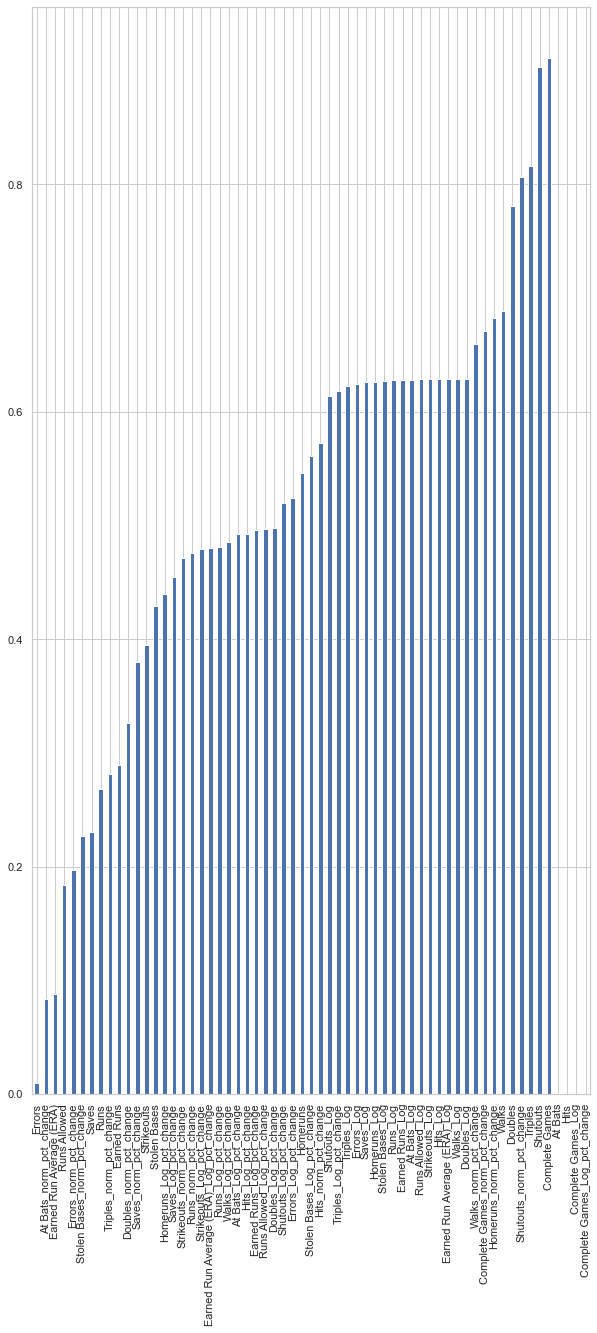

In [64]:
sel=f_classif(Xf_train, Y_train)
p_values=pd.Series(sel[1])
p_values.index=Xf_train.columns
p_values.sort_values(ascending=True, inplace=True)
p_values.plot.bar(figsize=(10,20))

# I have used these transformed values to generate pvalue of each feature (to explain label).

# Mathematical Notation

P Value = (sample proportion - Assumed population proportion in the null hypothesis)/(sqrt((Assumed population proportion in the null hypothesis * ( 1 - Assumed population proportion in the null hypothesis )) / n))

In [65]:
p_values=p_values[p_values<0.1]
p_values.index

Index(['Errors', 'At Bats_norm_pct_change', 'Earned Run Average (ERA)'], dtype='object')

# P Values are an important component of feature selection, with significance level set to 0.1, Variance Threshold
    ensemble technique returns with 90% confidence, all the features that have maximum explanatory capacity
For the present dataset features with pvalues with less than 0.1 are:
Index(['Errors', 'At Bats_norm_pct_change', 'Earned Run Average (ERA)'], dtype='object')

In [66]:
import numpy as np
x=x_frame1.copy()
x=x[['Errors', 'At Bats_norm_pct_change', 'Earned Run Average (ERA)']]
x.sample()

,Errors,At Bats_norm_pct_change,Earned Run Average (ERA)
2,153.382835,461.120316,363.369835


# The above table displays a sample of final x vector with features and values finally selected to be used for prediction.

In [67]:
y.sample()

15    100
Name: Number of predicted wins, dtype: int64

# The above series displays a sample of label.

In [68]:
x.shape, y.shape

((30, 3), (30,))

# The above cell displays final shapes of x and y vectors

In [69]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.6)

In [70]:
x_train.shape, y_train.shape

((12, 3), (12,))

# In the above two cells, I have divided final vectors with train test split technique, in which train data is 40% and test data is 60% to avoid overfitting issue.

# Model Development, Evaluation And Saving

# Selection Reasoning Of Models 1 to 5

# The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Two families of ensemble methods are usually distinguished:

In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.

Examples: Bagging methods, Forests of randomized trees, etcetera

By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

Examples: AdaBoost, Gradient Tree Boosting,etcetera

# The use case assigned revolves around very few data points (just 30 rows) hence there is high probality of not achieving a good fit. It is statistics concept that low variance and high bias can overfit, hence, I have tried different ensembele techniques that can lower variance and bias and help achieve a goodness of fit.

# The theories in the two cells above explain why I have chosen Model 1, Model 2, Model 3, Model 4 and Model 5 for this use case. Model 5 is decision tree regressor and hence, is again a very powerful implementation to prevent illness of fit.

# Model 1

# Random Forest Regressor With Grid Search CV Hyper Parameter Tuning

In [102]:
from sklearn.ensemble import RandomForestRegressor as el
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import matplotlib.pyplot as plt
import pickle
rfc2=el()
params = {
 'n_estimators': [50, 100],
 'criterion' : ['squared_error','absolute_error', 'poisson'],
 'bootstrap': [True, False],
 'oob_score':[True, False],
 'n_jobs':[None,-1],
 'warm_start':[True, False]
}
score2 = make_scorer(mean_squared_error)
gridsearch=GridSearchCV(rfc2, params, cv=5, return_train_score=True)
gridsearch.fit(x_train, y_train)
best_parameters=gridsearch.best_params_
best_score=gridsearch.best_score_
best_estim=gridsearch.best_estimator_
best_estim.fit(x_train,y_train)
y_pred2=best_estim.predict(x_train)
mse2 = mean_squared_error(y_train, y_pred2)
model3_train_score=best_estim.score(x_train, y_train)
model3_test_score=best_estim.score(x_test, y_test)
rmse2=np.sqrt(mse2)
ytst_pred2=best_estim.predict(x_test)
mse_test2=mean_squared_error(y_test, ytst_pred2)
rmse_test2=np.sqrt(mse_test2)
model3_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred2})
model3_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred2})

In [103]:
print('Train Score: ',np.round(model3_train_score,2))
print('Test Score: ',np.round(model3_test_score,2))
print('MSE Train: ',np.round(mse2,2))
print('RMSE Train: ',np.round(rmse2,2))
print('MSE Test: ',np.round(mse_test2,2))
print('RMSE Train: ',np.round(rmse_test2,2))

Train Score:  0.88
Test Score:  0.14
MSE Train:  8.0
RMSE Train:  2.83
MSE Test:  80.93
RMSE Train:  9.0



# Model 2

# Random Forest Regressor With Default Hyper Parameter Tuning

In [97]:
from sklearn.ensemble import RandomForestRegressor as el
from sklearn.model_selection import cross_val_score
rfc=el()
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))
scores=cross_val_score(rfc, x, y, cv=5)
cv_scores=scores.mean()
print(scores.std())
print(cv_scores)

0.9037565795113587
0.1147598473232635
2.11545916220867
-0.8738978516678408


In [98]:
train_prediction=rfc.predict(x_train)
test_prediction=rfc.predict(x_test)

In [100]:
mse_train = mean_squared_error(y_train, train_prediction)
mse = mean_squared_error(y_test, test_prediction)
rmse_train = np.sqrt(mse_train)
rmse = np.sqrt(mse)
mse_train, mse, rmse_train, rmse

(6.237108333333342, 83.75082222222223, 2.4974203357331226, 9.151547531550182)

# Model 3

# Ada Boost Regressor And Random Forest Regressor With Grid Search CV Hyper Parameter Tuning and Ada Boost Boosting

In [76]:
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import matplotlib.pyplot as plt
abreg = AdaBoostRegressor()
params = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }
score = make_scorer(mean_squared_error)
print(score)

make_scorer(mean_squared_error)


In [77]:
gridsearch=GridSearchCV(abreg, params, cv=5, return_train_score=True)
gridsearch.fit(x_train, y_train)
GridSearchCV(cv=5, error_score='raise', estimator=AdaBoostRegressor(base_estimator=rfc, learning_rate=1.0,loss='linear', n_estimators=50, random_state=None), n_jobs=1, param_grid={'n_estimators': [50, 100],'learning_rate': [0.01, 0.05, 0.1, 0.5],'loss': ['linear', 'square', 'exponential']},pre_dispatch='2*n_jobs', refit=True, return_train_score=True,scoring=None, verbose=0) 

GridSearchCV(cv=5, error_score='raise',
             estimator=AdaBoostRegressor(base_estimator=RandomForestRegressor()),
             n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100]},
             return_train_score=True)

In [78]:
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}
-2.3963642325485166


In [79]:
best_estim=gridsearch.best_estimator_
print(best_estim)

AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=100)


In [80]:
best_estim.fit(x_train,y_train)

ytr_pred=best_estim.predict(x_train)
mse = mean_squared_error(y_train, ytr_pred)
print('Train Score: ', best_estim.score(x_train, y_train))
print('Test score: ', best_estim.score(x_test, y_test))

Train Score:  0.9935914059151307
Test score:  0.2434631194336606


In [81]:
ytst_pred=best_estim.predict(x_test)
print('mse_train', mse)
print('rmse_train', np.sqrt(mse))
mse_test = mean_squared_error(y_test, ytst_pred)
print('mse_test', mse_test)
print('rmse_test', np.sqrt(mse_test))

mse_train 0.4153124999999996
rmse_train 0.6444474377325118
mse_test 71.57445987654322
rmse_test 8.460169021747923


In [101]:
model3_save=pickle.dumps(best_estim)

# Model 4

# Extra Trees Regressor With Grid Search CV Hyper Parameter Tuning

In [87]:
import sklearn
abreg = sklearn.ensemble.ExtraTreesRegressor()
params = {
 'n_estimators': [50, 100],
 'max_samples' : [0.01, 0.05, 0.1, 0.5],
 'bootstrap' : [True, False],
 'oob_score' : [True, False],
 'warm_start' : [True, False],
 'n_jobs'  : [1,-1],
 'random_state' : [0,10,100,1000,10000],
 'criterion' : ['squared_error', 'absolute_error'] 
 }
score = make_scorer(mean_squared_error)
print(score)

make_scorer(mean_squared_error)


In [88]:
gridsearch=GridSearchCV(abreg, params, cv=5, return_train_score=True)
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_samples': [0.01, 0.05, 0.1, 0.5],
                         'n_estimators': [50, 100], 'n_jobs': [1, -1],
                         'oob_score': [True, False],
                         'random_state': [0, 10, 100, 1000, 10000],
                         'warm_start': [True, False]},
             return_train_score=True)

In [89]:
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'bootstrap': True, 'criterion': 'squared_error', 'max_samples': 0.5, 'n_estimators': 50, 'n_jobs': 1, 'oob_score': True, 'random_state': 100, 'warm_start': True}
-0.1766788203564971


In [90]:
best_estim=gridsearch.best_estimator_
print(best_estim)

ExtraTreesRegressor(bootstrap=True, max_samples=0.5, n_estimators=50, n_jobs=1,
                    oob_score=True, random_state=100, warm_start=True)


In [91]:
best_estim.fit(x_train,y_train)

ytr_pred=best_estim.predict(x_train)
yts_pred=best_estim.predict(x_test)
mse = mean_squared_error(y_train, ytr_pred)
print('Train Score: ', best_estim.score(x_train, y_train))
print('Test score: ', best_estim.score(x_test, y_test))
print('mse_train: ', mse)
print('rmse_train', np.sqrt(mse))
mse_test=mean_squared_error(y_test, yts_pred)
print('mse_train: ', mse_test)
print('rmse_train', np.sqrt(mse_test))

Train Score:  0.6697227603943421
Test score:  -0.17577764003523333
mse_train:  21.4038
rmse_train 4.626424105072945
mse_train:  111.23800000000001
rmse_train 10.546942684968


# Model5

# Decision Tree Regressor With Default Hyper Parameter Tuning

In [93]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [94]:
tree.score(x_test, y_test)

0.24248850030992064

In [96]:
ytr_pred=tree.predict(x_train)
yts_pred=tree.predict(x_test)
mse = mean_squared_error(y_train, ytr_pred)
print('Train Score: ', tree.score(x_train, y_train))
print('Test score: ', tree.score(x_test, y_test))
print('mse_train: ', mse)
print('rmse_train', np.sqrt(mse))
mse_test=mean_squared_error(y_test, yts_pred)
print('mse_train: ', mse_test)
print('rmse_train', np.sqrt(mse_test))

Train Score:  1.0
Test score:  0.24248850030992064
mse_train:  0.0
rmse_train 0.0
mse_train:  71.66666666666667
rmse_train 8.465616732800196


# Best Model is saved in pickle for production

# Conclusion
Best Model is based on mse and rmse scores and best fit:

Model 3: Ada Boost Regressor And Random Forest Regressor With Grid Search CV Hyper Parameter Tuning and Ada Boost Boosting

mse_train 0.4153124999999996

rmse_train 0.6444474377325118

mse_test 71.57445987654322

rmse_test 8.460169021747923

# Credits:
DataTrained and Python Documentations.